# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [2]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [3]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

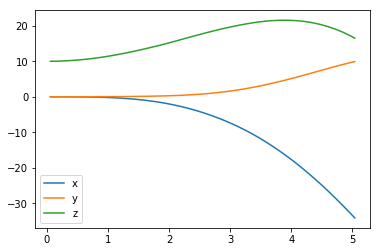

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

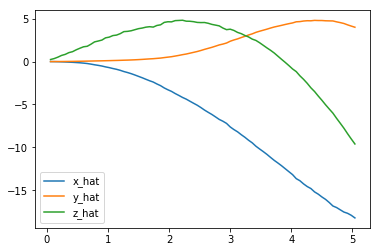

In [5]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

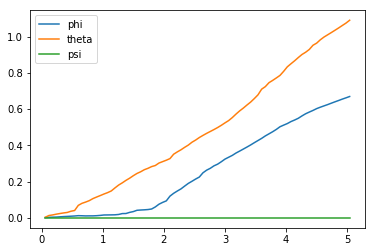

In [6]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

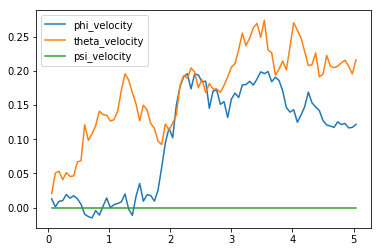

In [7]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

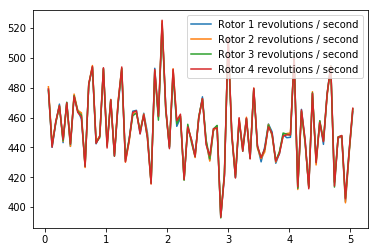

In [8]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [9]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[-34.13528247   9.93424927  16.52280714   0.6696724    1.09032015
   0.        ]
[-18.2372951    4.00547517  -9.61108672]
[0.12181812 0.21616631 0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [12]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode =    1, score =  -0.874 (best =  -0.874), noise_scale = 0.05

Episode =    2, score =  -0.776 (best =  -0.776), noise_scale = 0.025

Episode =    3, score =  -0.612 (best =  -0.612), noise_scale = 0.0125

Episode =    4, score =  -0.439 (best =  -0.439), noise_scale = 0.01

Episode =    5, score =  -0.673 (best =  -0.439), noise_scale = 0.02

Episode =    6, score =  -1.175 (best =  -0.439), noise_scale = 0.04

Episode =    7, score =  -0.615 (best =  -0.439), noise_scale = 0.08

Episode =    8, score =  -1.564 (best =  -0.439), noise_scale = 0.16

Episode =    9, score =  -0.338 (best =  -0.338), noise_scale = 0.08

Episode =   10, score =  -0.949 (best =  -0.338), noise_scale = 0.16

Episode =   11, score =  -0.804 (best =  -0.338), noise_scale = 0.32

Episode =   12, score =  -1.356 (best =  -0.338), noise_scale = 0.64

Episode =   13, score =  -0.922 (best =  -0.338), noise_scale = 1.28

Episode =   14, score =  -0.845 (best =  -0.338), noise_scale = 2.56

Episode =   15, score =  -0.868 (best =  -0.338), noise_scale = 3.2

Episode =   16, score =  -0.451 (best =  -0.338), noise_scale = 3.2

Episode =   17, score =  -0.337 (best =  -0.337), noise_scale = 1.6

Episode =   18, score =  -2.467 (best =  -0.337), noise_scale = 3.2

Episode =   19, score =  -0.551 (best =  -0.337), noise_scale = 3.2

Episode =   20, score =  -0.643 (best =  -0.337), noise_scale = 3.2

Episode =   21, score =  -0.700 (best =  -0.337), noise_scale = 3.2

Episode =   22, score =  -0.650 (best =  -0.337), noise_scale = 3.2

Episode =   23, score =  -1.938 (best =  -0.337), noise_scale = 3.2

Episode =   24, score =  -1.283 (best =  -0.337), noise_scale = 3.2

Episode =   25, score =  -0.248 (best =  -0.248), noise_scale = 1.6

Episode =   26, score =  -0.767 (best =  -0.248), noise_scale = 3.2

Episode =   27, score =  -0.891 (best =  -0.248), noise_scale = 3.2

Episode =   28, score =  -0.607 (best =  -0.248), noise_scale = 3.2

Episode =   29, score =  -0.832 (best =  -0.248), noise_scale = 3.2

Episode =   30, score =  -1.448 (best =  -0.248), noise_scale = 3.2

Episode =   31, score =  -0.983 (best =  -0.248), noise_scale = 3.2

Episode =   32, score =  -0.658 (best =  -0.248), noise_scale = 3.2

Episode =   33, score =  -0.435 (best =  -0.248), noise_scale = 3.2

Episode =   34, score =  -0.648 (best =  -0.248), noise_scale = 3.2

Episode =   35, score =  -0.918 (best =  -0.248), noise_scale = 3.2

Episode =   36, score =  -1.808 (best =  -0.248), noise_scale = 3.2

Episode =   37, score =  -0.639 (best =  -0.248), noise_scale = 3.2

Episode =   38, score =  -0.470 (best =  -0.248), noise_scale = 3.2

Episode =   39, score =  -1.128 (best =  -0.248), noise_scale = 3.2

Episode =   40, score =  -0.760 (best =  -0.248), noise_scale = 3.2

Episode =   41, score =  -0.912 (best =  -0.248), noise_scale = 3.2

Episode =   42, score =  -0.830 (best =  -0.248), noise_scale = 3.2

Episode =   43, score =  -0.606 (best =  -0.248), noise_scale = 3.2

Episode =   44, score =  -1.120 (best =  -0.248), noise_scale = 3.2

Episode =   45, score =  -0.751 (best =  -0.248), noise_scale = 3.2

Episode =   46, score =  -1.235 (best =  -0.248), noise_scale = 3.2

Episode =   47, score =  -1.519 (best =  -0.248), noise_scale = 3.2

Episode =   48, score =  -0.658 (best =  -0.248), noise_scale = 3.2

Episode =   49, score =  -0.653 (best =  -0.248), noise_scale = 3.2

Episode =   50, score =  -0.981 (best =  -0.248), noise_scale = 3.2

Episode =   51, score =  -0.777 (best =  -0.248), noise_scale = 3.2

Episode =   52, score =  -0.581 (best =  -0.248), noise_scale = 3.2

Episode =   53, score =  -0.867 (best =  -0.248), noise_scale = 3.2

Episode =   54, score =  -0.581 (best =  -0.248), noise_scale = 3.2

Episode =   55, score =  -0.948 (best =  -0.248), noise_scale = 3.2

Episode =   56, score =  -0.406 (best =  -0.248), noise_scale = 3.2

Episode =   57, score =  -1.139 (best =  -0.248), noise_scale = 3.2

Episode =   58, score =  -0.427 (best =  -0.248), noise_scale = 3.2

Episode =   59, score =  -0.571 (best =  -0.248), noise_scale = 3.2

Episode =   60, score =  -0.745 (best =  -0.248), noise_scale = 3.2

Episode =   61, score =  -1.974 (best =  -0.248), noise_scale = 3.2

Episode =   62, score =  -0.148 (best =  -0.148), noise_scale = 1.6

Episode =   63, score =  -0.723 (best =  -0.148), noise_scale = 3.2

Episode =   64, score =  -0.851 (best =  -0.148), noise_scale = 3.2

Episode =   65, score =  -0.291 (best =  -0.148), noise_scale = 3.2

Episode =   66, score =  -0.889 (best =  -0.148), noise_scale = 3.2

Episode =   67, score =  -1.047 (best =  -0.148), noise_scale = 3.2

Episode =   68, score =  -1.182 (best =  -0.148), noise_scale = 3.2

Episode =   69, score =  -0.945 (best =  -0.148), noise_scale = 3.2

Episode =   70, score =  -1.178 (best =  -0.148), noise_scale = 3.2

Episode =   71, score =  -0.532 (best =  -0.148), noise_scale = 3.2

Episode =   72, score =  -0.541 (best =  -0.148), noise_scale = 3.2

Episode =   73, score =  -1.701 (best =  -0.148), noise_scale = 3.2

Episode =   74, score =  -0.646 (best =  -0.148), noise_scale = 3.2

Episode =   75, score =  -0.656 (best =  -0.148), noise_scale = 3.2

Episode =   76, score =  -1.601 (best =  -0.148), noise_scale = 3.2

Episode =   77, score =  -1.516 (best =  -0.148), noise_scale = 3.2

Episode =   78, score =  -1.214 (best =  -0.148), noise_scale = 3.2

Episode =   79, score =  -0.872 (best =  -0.148), noise_scale = 3.2

Episode =   80, score =  -1.350 (best =  -0.148), noise_scale = 3.2

Episode =   81, score =  -0.553 (best =  -0.148), noise_scale = 3.2

Episode =   82, score =  -0.399 (best =  -0.148), noise_scale = 3.2

Episode =   83, score =  -0.839 (best =  -0.148), noise_scale = 3.2

Episode =   84, score =  -0.500 (best =  -0.148), noise_scale = 3.2

Episode =   85, score =  -0.558 (best =  -0.148), noise_scale = 3.2

Episode =   86, score =  -0.578 (best =  -0.148), noise_scale = 3.2

Episode =   87, score =  -0.713 (best =  -0.148), noise_scale = 3.2

Episode =   88, score =  -0.148 (best =  -0.148), noise_scale = 3.2

Episode =   89, score =  -1.351 (best =  -0.148), noise_scale = 3.2

Episode =   90, score =  -0.050 (best =  -0.050), noise_scale = 1.6

Episode =   91, score =  -1.384 (best =  -0.050), noise_scale = 3.2

Episode =   92, score =  -0.759 (best =  -0.050), noise_scale = 3.2

Episode =   93, score =  -1.727 (best =  -0.050), noise_scale = 3.2

Episode =   94, score =  -1.099 (best =  -0.050), noise_scale = 3.2

Episode =   95, score =  -1.027 (best =  -0.050), noise_scale = 3.2

Episode =   96, score =  -0.763 (best =  -0.050), noise_scale = 3.2

Episode =   97, score =  -0.830 (best =  -0.050), noise_scale = 3.2

Episode =   98, score =  -0.593 (best =  -0.050), noise_scale = 3.2

Episode =   99, score =  -0.088 (best =  -0.050), noise_scale = 3.2

Episode =  100, score =  -2.512 (best =  -0.050), noise_scale = 3.2

Episode =  101, score =  -1.343 (best =  -0.050), noise_scale = 3.2

Episode =  102, score =  -1.007 (best =  -0.050), noise_scale = 3.2

Episode =  103, score =  -1.706 (best =  -0.050), noise_scale = 3.2

Episode =  104, score =  -1.145 (best =  -0.050), noise_scale = 3.2

Episode =  105, score =  -0.741 (best =  -0.050), noise_scale = 3.2

Episode =  106, score =  -0.868 (best =  -0.050), noise_scale = 3.2

Episode =  107, score =  -0.473 (best =  -0.050), noise_scale = 3.2

Episode =  108, score =  -1.384 (best =  -0.050), noise_scale = 3.2

Episode =  109, score =  -0.407 (best =  -0.050), noise_scale = 3.2

Episode =  110, score =  -0.486 (best =  -0.050), noise_scale = 3.2

Episode =  111, score =  -1.410 (best =  -0.050), noise_scale = 3.2

Episode =  112, score =  -0.621 (best =  -0.050), noise_scale = 3.2

Episode =  113, score =  -1.214 (best =  -0.050), noise_scale = 3.2

Episode =  114, score =  -0.785 (best =  -0.050), noise_scale = 3.2

Episode =  115, score =  -0.885 (best =  -0.050), noise_scale = 3.2

Episode =  116, score =  -1.397 (best =  -0.050), noise_scale = 3.2

Episode =  117, score =  -0.709 (best =  -0.050), noise_scale = 3.2

Episode =  118, score =  -1.531 (best =  -0.050), noise_scale = 3.2

Episode =  119, score =  -0.283 (best =  -0.050), noise_scale = 3.2

Episode =  120, score =  -0.689 (best =  -0.050), noise_scale = 3.2

Episode =  121, score =  -0.643 (best =  -0.050), noise_scale = 3.2

Episode =  122, score =  -1.289 (best =  -0.050), noise_scale = 3.2

Episode =  123, score =  -0.904 (best =  -0.050), noise_scale = 3.2

Episode =  124, score =  -0.561 (best =  -0.050), noise_scale = 3.2

Episode =  125, score =  -0.228 (best =  -0.050), noise_scale = 3.2

Episode =  126, score =  -1.449 (best =  -0.050), noise_scale = 3.2

Episode =  127, score =  -1.171 (best =  -0.050), noise_scale = 3.2

Episode =  128, score =  -0.090 (best =  -0.050), noise_scale = 3.2

Episode =  129, score =  -0.751 (best =  -0.050), noise_scale = 3.2

Episode =  130, score =  -1.451 (best =  -0.050), noise_scale = 3.2

Episode =  131, score =  -0.723 (best =  -0.050), noise_scale = 3.2

Episode =  132, score =  -0.878 (best =  -0.050), noise_scale = 3.2

Episode =  133, score =  -1.274 (best =  -0.050), noise_scale = 3.2

Episode =  134, score =  -0.386 (best =  -0.050), noise_scale = 3.2

Episode =  135, score =  -0.982 (best =  -0.050), noise_scale = 3.2

Episode =  136, score =  -1.076 (best =  -0.050), noise_scale = 3.2

Episode =  137, score =  -1.322 (best =  -0.050), noise_scale = 3.2

Episode =  138, score =  -1.487 (best =  -0.050), noise_scale = 3.2

Episode =  139, score =  -1.572 (best =  -0.050), noise_scale = 3.2

Episode =  140, score =  -0.748 (best =  -0.050), noise_scale = 3.2

Episode =  141, score =  -0.681 (best =  -0.050), noise_scale = 3.2

Episode =  142, score =  -0.886 (best =  -0.050), noise_scale = 3.2

Episode =  143, score =  -0.219 (best =  -0.050), noise_scale = 3.2

Episode =  144, score =  -0.899 (best =  -0.050), noise_scale = 3.2

Episode =  145, score =  -1.984 (best =  -0.050), noise_scale = 3.2

Episode =  146, score =  -0.795 (best =  -0.050), noise_scale = 3.2

Episode =  147, score =  -0.344 (best =  -0.050), noise_scale = 3.2

Episode =  148, score =  -1.585 (best =  -0.050), noise_scale = 3.2

Episode =  149, score =  -0.815 (best =  -0.050), noise_scale = 3.2

Episode =  150, score =  -0.798 (best =  -0.050), noise_scale = 3.2

Episode =  151, score =  -0.808 (best =  -0.050), noise_scale = 3.2

Episode =  152, score =  -0.802 (best =  -0.050), noise_scale = 3.2

Episode =  153, score =  -0.474 (best =  -0.050), noise_scale = 3.2

Episode =  154, score =  -0.917 (best =  -0.050), noise_scale = 3.2

Episode =  155, score =  -0.589 (best =  -0.050), noise_scale = 3.2

Episode =  156, score =  -0.860 (best =  -0.050), noise_scale = 3.2

Episode =  157, score =  -1.186 (best =  -0.050), noise_scale = 3.2

Episode =  158, score =  -1.080 (best =  -0.050), noise_scale = 3.2

Episode =  159, score =  -0.402 (best =  -0.050), noise_scale = 3.2

Episode =  160, score =  -1.692 (best =  -0.050), noise_scale = 3.2

Episode =  161, score =  -1.650 (best =  -0.050), noise_scale = 3.2

Episode =  162, score =  -0.870 (best =  -0.050), noise_scale = 3.2

Episode =  163, score =  -0.426 (best =  -0.050), noise_scale = 3.2

Episode =  164, score =  -1.105 (best =  -0.050), noise_scale = 3.2

Episode =  165, score =  -0.500 (best =  -0.050), noise_scale = 3.2

Episode =  166, score =  -0.875 (best =  -0.050), noise_scale = 3.2

Episode =  167, score =  -0.644 (best =  -0.050), noise_scale = 3.2

Episode =  168, score =  -1.122 (best =  -0.050), noise_scale = 3.2

Episode =  169, score =  -2.008 (best =  -0.050), noise_scale = 3.2

Episode =  170, score =  -0.336 (best =  -0.050), noise_scale = 3.2

Episode =  171, score =  -1.154 (best =  -0.050), noise_scale = 3.2

Episode =  172, score =  -1.368 (best =  -0.050), noise_scale = 3.2

Episode =  173, score =  -0.700 (best =  -0.050), noise_scale = 3.2

Episode =  174, score =  -0.471 (best =  -0.050), noise_scale = 3.2

Episode =  175, score =  -1.335 (best =  -0.050), noise_scale = 3.2

Episode =  176, score =  -0.734 (best =  -0.050), noise_scale = 3.2

Episode =  177, score =  -1.114 (best =  -0.050), noise_scale = 3.2

Episode =  178, score =  -0.416 (best =  -0.050), noise_scale = 3.2

Episode =  179, score =  -3.139 (best =  -0.050), noise_scale = 3.2

Episode =  180, score =  -1.339 (best =  -0.050), noise_scale = 3.2

Episode =  181, score =  -0.569 (best =  -0.050), noise_scale = 3.2

Episode =  182, score =  -0.680 (best =  -0.050), noise_scale = 3.2

Episode =  183, score =  -1.165 (best =  -0.050), noise_scale = 3.2

Episode =  184, score =  -1.196 (best =  -0.050), noise_scale = 3.2

Episode =  185, score =  -1.438 (best =  -0.050), noise_scale = 3.2

Episode =  186, score =  -1.436 (best =  -0.050), noise_scale = 3.2

Episode =  187, score =  -0.823 (best =  -0.050), noise_scale = 3.2

Episode =  188, score =  -0.953 (best =  -0.050), noise_scale = 3.2

Episode =  189, score =  -0.337 (best =  -0.050), noise_scale = 3.2

Episode =  190, score =  -1.567 (best =  -0.050), noise_scale = 3.2

Episode =  191, score =  -0.919 (best =  -0.050), noise_scale = 3.2

Episode =  192, score =  -0.591 (best =  -0.050), noise_scale = 3.2

Episode =  193, score =  -1.636 (best =  -0.050), noise_scale = 3.2

Episode =  194, score =  -1.047 (best =  -0.050), noise_scale = 3.2

Episode =  195, score =  -0.459 (best =  -0.050), noise_scale = 3.2

Episode =  196, score =  -0.680 (best =  -0.050), noise_scale = 3.2

Episode =  197, score =  -0.642 (best =  -0.050), noise_scale = 3.2

Episode =  198, score =  -1.430 (best =  -0.050), noise_scale = 3.2

Episode =  199, score =  -0.369 (best =  -0.050), noise_scale = 3.2

Episode =  200, score =  -0.749 (best =  -0.050), noise_scale = 3.2

Episode =  201, score =  -1.102 (best =  -0.050), noise_scale = 3.2

Episode =  202, score =  -0.621 (best =  -0.050), noise_scale = 3.2

Episode =  203, score =  -0.969 (best =  -0.050), noise_scale = 3.2

Episode =  204, score =  -1.272 (best =  -0.050), noise_scale = 3.2

Episode =  205, score =  -0.892 (best =  -0.050), noise_scale = 3.2

Episode =  206, score =  -0.329 (best =  -0.050), noise_scale = 3.2

Episode =  207, score =  -0.591 (best =  -0.050), noise_scale = 3.2

Episode =  208, score =  -1.288 (best =  -0.050), noise_scale = 3.2

Episode =  209, score =  -0.793 (best =  -0.050), noise_scale = 3.2

Episode =  210, score =  -0.511 (best =  -0.050), noise_scale = 3.2

Episode =  211, score =  -0.457 (best =  -0.050), noise_scale = 3.2

Episode =  212, score =  -0.962 (best =  -0.050), noise_scale = 3.2

Episode =  213, score =  -1.846 (best =  -0.050), noise_scale = 3.2

Episode =  214, score =  -0.543 (best =  -0.050), noise_scale = 3.2

Episode =  215, score =  -1.317 (best =  -0.050), noise_scale = 3.2

Episode =  216, score =  -0.667 (best =  -0.050), noise_scale = 3.2

Episode =  217, score =  -0.383 (best =  -0.050), noise_scale = 3.2

Episode =  218, score =  -0.806 (best =  -0.050), noise_scale = 3.2

Episode =  219, score =  -1.376 (best =  -0.050), noise_scale = 3.2

Episode =  220, score =  -0.815 (best =  -0.050), noise_scale = 3.2

Episode =  221, score =  -0.542 (best =  -0.050), noise_scale = 3.2

Episode =  222, score =  -1.023 (best =  -0.050), noise_scale = 3.2

Episode =  223, score =  -1.129 (best =  -0.050), noise_scale = 3.2

Episode =  224, score =  -1.225 (best =  -0.050), noise_scale = 3.2

Episode =  225, score =  -1.403 (best =  -0.050), noise_scale = 3.2

Episode =  226, score =  -0.405 (best =  -0.050), noise_scale = 3.2

Episode =  227, score =  -0.723 (best =  -0.050), noise_scale = 3.2

Episode =  228, score =  -0.710 (best =  -0.050), noise_scale = 3.2

Episode =  229, score =  -0.898 (best =  -0.050), noise_scale = 3.2

Episode =  230, score =  -0.341 (best =  -0.050), noise_scale = 3.2

Episode =  231, score =  -0.992 (best =  -0.050), noise_scale = 3.2

Episode =  232, score =  -0.957 (best =  -0.050), noise_scale = 3.2

Episode =  233, score =  -0.724 (best =  -0.050), noise_scale = 3.2

Episode =  234, score =  -0.713 (best =  -0.050), noise_scale = 3.2

Episode =  235, score =  -0.320 (best =  -0.050), noise_scale = 3.2

Episode =  236, score =  -1.082 (best =  -0.050), noise_scale = 3.2

Episode =  237, score =  -0.770 (best =  -0.050), noise_scale = 3.2

Episode =  238, score =  -0.246 (best =  -0.050), noise_scale = 3.2

Episode =  239, score =  -0.646 (best =  -0.050), noise_scale = 3.2

Episode =  240, score =  -0.922 (best =  -0.050), noise_scale = 3.2

Episode =  241, score =  -0.365 (best =  -0.050), noise_scale = 3.2

Episode =  242, score =  -0.837 (best =  -0.050), noise_scale = 3.2

Episode =  243, score =  -0.439 (best =  -0.050), noise_scale = 3.2

Episode =  244, score =  -1.280 (best =  -0.050), noise_scale = 3.2

Episode =  245, score =  -0.739 (best =  -0.050), noise_scale = 3.2

Episode =  246, score =  -0.460 (best =  -0.050), noise_scale = 3.2

Episode =  247, score =  -0.254 (best =  -0.050), noise_scale = 3.2

Episode =  248, score =  -0.681 (best =  -0.050), noise_scale = 3.2

Episode =  249, score =  -0.432 (best =  -0.050), noise_scale = 3.2

Episode =  250, score =  -1.042 (best =  -0.050), noise_scale = 3.2

Episode =  251, score =  -0.695 (best =  -0.050), noise_scale = 3.2

Episode =  252, score =  -1.162 (best =  -0.050), noise_scale = 3.2

Episode =  253, score =  -1.376 (best =  -0.050), noise_scale = 3.2

Episode =  254, score =  -1.197 (best =  -0.050), noise_scale = 3.2

Episode =  255, score =  -1.836 (best =  -0.050), noise_scale = 3.2

Episode =  256, score =  -0.139 (best =  -0.050), noise_scale = 3.2

Episode =  257, score =  -1.163 (best =  -0.050), noise_scale = 3.2

Episode =  258, score =  -1.313 (best =  -0.050), noise_scale = 3.2

Episode =  259, score =  -2.403 (best =  -0.050), noise_scale = 3.2

Episode =  260, score =  -0.446 (best =  -0.050), noise_scale = 3.2

Episode =  261, score =  -1.746 (best =  -0.050), noise_scale = 3.2

Episode =  262, score =  -0.913 (best =  -0.050), noise_scale = 3.2

Episode =  263, score =  -0.927 (best =  -0.050), noise_scale = 3.2

Episode =  264, score =  -0.732 (best =  -0.050), noise_scale = 3.2

Episode =  265, score =  -1.857 (best =  -0.050), noise_scale = 3.2

Episode =  266, score =  -1.144 (best =  -0.050), noise_scale = 3.2

Episode =  267, score =  -1.355 (best =  -0.050), noise_scale = 3.2

Episode =  268, score =  -0.870 (best =  -0.050), noise_scale = 3.2

Episode =  269, score =  -1.054 (best =  -0.050), noise_scale = 3.2

Episode =  270, score =  -0.650 (best =  -0.050), noise_scale = 3.2

Episode =  271, score =  -0.670 (best =  -0.050), noise_scale = 3.2

Episode =  272, score =  -1.805 (best =  -0.050), noise_scale = 3.2

Episode =  273, score =  -1.284 (best =  -0.050), noise_scale = 3.2

Episode =  274, score =  -1.297 (best =  -0.050), noise_scale = 3.2

Episode =  275, score =  -0.894 (best =  -0.050), noise_scale = 3.2

Episode =  276, score =  -0.740 (best =  -0.050), noise_scale = 3.2

Episode =  277, score =  -1.313 (best =  -0.050), noise_scale = 3.2

Episode =  278, score =  -0.750 (best =  -0.050), noise_scale = 3.2

Episode =  279, score =  -1.318 (best =  -0.050), noise_scale = 3.2

Episode =  280, score =  -0.655 (best =  -0.050), noise_scale = 3.2

Episode =  281, score =  -1.301 (best =  -0.050), noise_scale = 3.2

Episode =  282, score =  -0.679 (best =  -0.050), noise_scale = 3.2

Episode =  283, score =  -2.286 (best =  -0.050), noise_scale = 3.2

Episode =  284, score =  -0.662 (best =  -0.050), noise_scale = 3.2

Episode =  285, score =  -1.185 (best =  -0.050), noise_scale = 3.2

Episode =  286, score =  -0.815 (best =  -0.050), noise_scale = 3.2

Episode =  287, score =  -0.208 (best =  -0.050), noise_scale = 3.2

Episode =  288, score =  -0.464 (best =  -0.050), noise_scale = 3.2

Episode =  289, score =  -0.846 (best =  -0.050), noise_scale = 3.2

Episode =  290, score =  -1.304 (best =  -0.050), noise_scale = 3.2

Episode =  291, score =  -1.190 (best =  -0.050), noise_scale = 3.2

Episode =  292, score =  -0.649 (best =  -0.050), noise_scale = 3.2

Episode =  293, score =  -2.093 (best =  -0.050), noise_scale = 3.2

Episode =  294, score =  -0.234 (best =  -0.050), noise_scale = 3.2

Episode =  295, score =  -1.531 (best =  -0.050), noise_scale = 3.2

Episode =  296, score =  -0.636 (best =  -0.050), noise_scale = 3.2

Episode =  297, score =  -1.014 (best =  -0.050), noise_scale = 3.2

Episode =  298, score =  -0.985 (best =  -0.050), noise_scale = 3.2

Episode =  299, score =  -0.641 (best =  -0.050), noise_scale = 3.2

Episode =  300, score =  -0.353 (best =  -0.050), noise_scale = 3.2

Episode =  301, score =  -0.718 (best =  -0.050), noise_scale = 3.2

Episode =  302, score =  -0.264 (best =  -0.050), noise_scale = 3.2

Episode =  303, score =  -0.710 (best =  -0.050), noise_scale = 3.2

Episode =  304, score =  -0.711 (best =  -0.050), noise_scale = 3.2

Episode =  305, score =  -1.915 (best =  -0.050), noise_scale = 3.2

Episode =  306, score =  -1.427 (best =  -0.050), noise_scale = 3.2

Episode =  307, score =  -0.241 (best =  -0.050), noise_scale = 3.2

Episode =  308, score =  -1.637 (best =  -0.050), noise_scale = 3.2

Episode =  309, score =  -0.295 (best =  -0.050), noise_scale = 3.2

Episode =  310, score =  -0.793 (best =  -0.050), noise_scale = 3.2

Episode =  311, score =  -0.734 (best =  -0.050), noise_scale = 3.2

Episode =  312, score =  -0.622 (best =  -0.050), noise_scale = 3.2

Episode =  313, score =  -1.850 (best =  -0.050), noise_scale = 3.2

Episode =  314, score =  -1.400 (best =  -0.050), noise_scale = 3.2

Episode =  315, score =  -0.872 (best =  -0.050), noise_scale = 3.2

Episode =  316, score =  -0.779 (best =  -0.050), noise_scale = 3.2

Episode =  317, score =  -0.707 (best =  -0.050), noise_scale = 3.2

Episode =  318, score =  -1.229 (best =  -0.050), noise_scale = 3.2

Episode =  319, score =  -1.114 (best =  -0.050), noise_scale = 3.2

Episode =  320, score =  -0.521 (best =  -0.050), noise_scale = 3.2

Episode =  321, score =  -1.867 (best =  -0.050), noise_scale = 3.2

Episode =  322, score =  -1.110 (best =  -0.050), noise_scale = 3.2

Episode =  323, score =  -1.129 (best =  -0.050), noise_scale = 3.2

Episode =  324, score =  -0.962 (best =  -0.050), noise_scale = 3.2

Episode =  325, score =  -0.529 (best =  -0.050), noise_scale = 3.2

Episode =  326, score =  -1.566 (best =  -0.050), noise_scale = 3.2

Episode =  327, score =  -1.130 (best =  -0.050), noise_scale = 3.2

Episode =  328, score =  -0.462 (best =  -0.050), noise_scale = 3.2

Episode =  329, score =  -1.159 (best =  -0.050), noise_scale = 3.2

Episode =  330, score =  -0.397 (best =  -0.050), noise_scale = 3.2

Episode =  331, score =  -0.450 (best =  -0.050), noise_scale = 3.2

Episode =  332, score =  -0.542 (best =  -0.050), noise_scale = 3.2

Episode =  333, score =  -0.429 (best =  -0.050), noise_scale = 3.2

Episode =  334, score =  -1.533 (best =  -0.050), noise_scale = 3.2

Episode =  335, score =  -1.185 (best =  -0.050), noise_scale = 3.2

Episode =  336, score =  -2.092 (best =  -0.050), noise_scale = 3.2

Episode =  337, score =  -1.293 (best =  -0.050), noise_scale = 3.2

Episode =  338, score =  -1.056 (best =  -0.050), noise_scale = 3.2

Episode =  339, score =  -0.520 (best =  -0.050), noise_scale = 3.2

Episode =  340, score =  -1.581 (best =  -0.050), noise_scale = 3.2

Episode =  341, score =  -1.266 (best =  -0.050), noise_scale = 3.2

Episode =  342, score =  -0.549 (best =  -0.050), noise_scale = 3.2

Episode =  343, score =  -1.006 (best =  -0.050), noise_scale = 3.2

Episode =  344, score =  -0.942 (best =  -0.050), noise_scale = 3.2

Episode =  345, score =  -0.951 (best =  -0.050), noise_scale = 3.2

Episode =  346, score =  -0.647 (best =  -0.050), noise_scale = 3.2

Episode =  347, score =  -0.893 (best =  -0.050), noise_scale = 3.2

Episode =  348, score =  -0.924 (best =  -0.050), noise_scale = 3.2

Episode =  349, score =  -0.886 (best =  -0.050), noise_scale = 3.2

Episode =  350, score =  -1.031 (best =  -0.050), noise_scale = 3.2

Episode =  351, score =  -0.810 (best =  -0.050), noise_scale = 3.2

Episode =  352, score =  -0.649 (best =  -0.050), noise_scale = 3.2

Episode =  353, score =  -1.020 (best =  -0.050), noise_scale = 3.2

Episode =  354, score =  -0.313 (best =  -0.050), noise_scale = 3.2

Episode =  355, score =  -0.901 (best =  -0.050), noise_scale = 3.2

Episode =  356, score =  -1.346 (best =  -0.050), noise_scale = 3.2

Episode =  357, score =  -0.705 (best =  -0.050), noise_scale = 3.2

Episode =  358, score =  -0.668 (best =  -0.050), noise_scale = 3.2

Episode =  359, score =  -0.352 (best =  -0.050), noise_scale = 3.2

Episode =  360, score =  -0.636 (best =  -0.050), noise_scale = 3.2

Episode =  361, score =  -0.973 (best =  -0.050), noise_scale = 3.2

Episode =  362, score =  -0.893 (best =  -0.050), noise_scale = 3.2

Episode =  363, score =  -1.137 (best =  -0.050), noise_scale = 3.2

Episode =  364, score =  -0.478 (best =  -0.050), noise_scale = 3.2

Episode =  365, score =  -0.865 (best =  -0.050), noise_scale = 3.2

Episode =  366, score =  -0.676 (best =  -0.050), noise_scale = 3.2

Episode =  367, score =  -0.774 (best =  -0.050), noise_scale = 3.2

Episode =  368, score =  -1.473 (best =  -0.050), noise_scale = 3.2

Episode =  369, score =  -0.739 (best =  -0.050), noise_scale = 3.2

Episode =  370, score =  -1.393 (best =  -0.050), noise_scale = 3.2

Episode =  371, score =  -1.796 (best =  -0.050), noise_scale = 3.2

Episode =  372, score =  -0.340 (best =  -0.050), noise_scale = 3.2

Episode =  373, score =  -0.245 (best =  -0.050), noise_scale = 3.2

Episode =  374, score =  -0.392 (best =  -0.050), noise_scale = 3.2

Episode =  375, score =  -0.980 (best =  -0.050), noise_scale = 3.2

Episode =  376, score =  -0.530 (best =  -0.050), noise_scale = 3.2

Episode =  377, score =  -0.718 (best =  -0.050), noise_scale = 3.2

Episode =  378, score =  -0.549 (best =  -0.050), noise_scale = 3.2

Episode =  379, score =  -0.693 (best =  -0.050), noise_scale = 3.2

Episode =  380, score =  -0.545 (best =  -0.050), noise_scale = 3.2

Episode =  381, score =  -1.354 (best =  -0.050), noise_scale = 3.2

Episode =  382, score =  -0.837 (best =  -0.050), noise_scale = 3.2

Episode =  383, score =  -0.349 (best =  -0.050), noise_scale = 3.2

Episode =  384, score =  -0.329 (best =  -0.050), noise_scale = 3.2

Episode =  385, score =  -1.351 (best =  -0.050), noise_scale = 3.2

Episode =  386, score =  -0.671 (best =  -0.050), noise_scale = 3.2

Episode =  387, score =  -0.060 (best =  -0.050), noise_scale = 3.2

Episode =  388, score =  -0.778 (best =  -0.050), noise_scale = 3.2

Episode =  389, score =  -1.005 (best =  -0.050), noise_scale = 3.2

Episode =  390, score =  -0.462 (best =  -0.050), noise_scale = 3.2

Episode =  391, score =  -0.987 (best =  -0.050), noise_scale = 3.2

Episode =  392, score =  -0.856 (best =  -0.050), noise_scale = 3.2

Episode =  393, score =  -1.877 (best =  -0.050), noise_scale = 3.2

Episode =  394, score =  -0.953 (best =  -0.050), noise_scale = 3.2

Episode =  395, score =  -1.088 (best =  -0.050), noise_scale = 3.2

Episode =  396, score =  -0.450 (best =  -0.050), noise_scale = 3.2

Episode =  397, score =  -0.962 (best =  -0.050), noise_scale = 3.2

Episode =  398, score =  -0.244 (best =  -0.050), noise_scale = 3.2

Episode =  399, score =  -1.214 (best =  -0.050), noise_scale = 3.2

Episode =  400, score =  -0.741 (best =  -0.050), noise_scale = 3.2

Episode =  401, score =  -0.282 (best =  -0.050), noise_scale = 3.2

Episode =  402, score =  -0.484 (best =  -0.050), noise_scale = 3.2

Episode =  403, score =  -1.107 (best =  -0.050), noise_scale = 3.2

Episode =  404, score =  -0.949 (best =  -0.050), noise_scale = 3.2

Episode =  405, score =  -0.746 (best =  -0.050), noise_scale = 3.2

Episode =  406, score =  -1.803 (best =  -0.050), noise_scale = 3.2

Episode =  407, score =  -0.465 (best =  -0.050), noise_scale = 3.2

Episode =  408, score =  -0.333 (best =  -0.050), noise_scale = 3.2

Episode =  409, score =  -0.856 (best =  -0.050), noise_scale = 3.2

Episode =  410, score =  -2.011 (best =  -0.050), noise_scale = 3.2

Episode =  411, score =  -1.282 (best =  -0.050), noise_scale = 3.2

Episode =  412, score =  -0.852 (best =  -0.050), noise_scale = 3.2

Episode =  413, score =  -1.102 (best =  -0.050), noise_scale = 3.2

Episode =  414, score =  -0.390 (best =  -0.050), noise_scale = 3.2

Episode =  415, score =  -1.225 (best =  -0.050), noise_scale = 3.2

Episode =  416, score =  -1.390 (best =  -0.050), noise_scale = 3.2

Episode =  417, score =  -1.091 (best =  -0.050), noise_scale = 3.2

Episode =  418, score =  -0.506 (best =  -0.050), noise_scale = 3.2

Episode =  419, score =  -0.980 (best =  -0.050), noise_scale = 3.2

Episode =  420, score =  -0.442 (best =  -0.050), noise_scale = 3.2

Episode =  421, score =  -0.968 (best =  -0.050), noise_scale = 3.2

Episode =  422, score =  -1.016 (best =  -0.050), noise_scale = 3.2

Episode =  423, score =  -1.083 (best =  -0.050), noise_scale = 3.2

Episode =  424, score =  -1.126 (best =  -0.050), noise_scale = 3.2

Episode =  425, score =  -1.277 (best =  -0.050), noise_scale = 3.2

Episode =  426, score =  -1.273 (best =  -0.050), noise_scale = 3.2

Episode =  427, score =  -3.500 (best =  -0.050), noise_scale = 3.2

Episode =  428, score =  -0.583 (best =  -0.050), noise_scale = 3.2

Episode =  429, score =  -0.496 (best =  -0.050), noise_scale = 3.2

Episode =  430, score =  -0.541 (best =  -0.050), noise_scale = 3.2

Episode =  431, score =  -0.969 (best =  -0.050), noise_scale = 3.2

Episode =  432, score =  -1.376 (best =  -0.050), noise_scale = 3.2

Episode =  433, score =  -0.649 (best =  -0.050), noise_scale = 3.2

Episode =  434, score =  -0.731 (best =  -0.050), noise_scale = 3.2

Episode =  435, score =  -0.584 (best =  -0.050), noise_scale = 3.2

Episode =  436, score =  -0.960 (best =  -0.050), noise_scale = 3.2

Episode =  437, score =  -1.254 (best =  -0.050), noise_scale = 3.2

Episode =  438, score =  -1.671 (best =  -0.050), noise_scale = 3.2

Episode =  439, score =  -0.834 (best =  -0.050), noise_scale = 3.2

Episode =  440, score =  -0.998 (best =  -0.050), noise_scale = 3.2

Episode =  441, score =  -0.233 (best =  -0.050), noise_scale = 3.2

Episode =  442, score =  -1.372 (best =  -0.050), noise_scale = 3.2

Episode =  443, score =  -0.820 (best =  -0.050), noise_scale = 3.2

Episode =  444, score =  -0.621 (best =  -0.050), noise_scale = 3.2

Episode =  445, score =  -1.289 (best =  -0.050), noise_scale = 3.2

Episode =  446, score =  -2.159 (best =  -0.050), noise_scale = 3.2

Episode =  447, score =  -0.587 (best =  -0.050), noise_scale = 3.2

Episode =  448, score =  -1.973 (best =  -0.050), noise_scale = 3.2

Episode =  449, score =  -1.303 (best =  -0.050), noise_scale = 3.2

Episode =  450, score =  -0.853 (best =  -0.050), noise_scale = 3.2

Episode =  451, score =  -0.421 (best =  -0.050), noise_scale = 3.2

Episode =  452, score =  -1.134 (best =  -0.050), noise_scale = 3.2

Episode =  453, score =  -0.495 (best =  -0.050), noise_scale = 3.2

Episode =  454, score =  -0.130 (best =  -0.050), noise_scale = 3.2

Episode =  455, score =  -0.332 (best =  -0.050), noise_scale = 3.2

Episode =  456, score =  -0.929 (best =  -0.050), noise_scale = 3.2

Episode =  457, score =  -1.107 (best =  -0.050), noise_scale = 3.2

Episode =  458, score =  -1.801 (best =  -0.050), noise_scale = 3.2

Episode =  459, score =  -0.543 (best =  -0.050), noise_scale = 3.2

Episode =  460, score =  -1.274 (best =  -0.050), noise_scale = 3.2

Episode =  461, score =  -0.776 (best =  -0.050), noise_scale = 3.2

Episode =  462, score =  -1.778 (best =  -0.050), noise_scale = 3.2

Episode =  463, score =  -0.571 (best =  -0.050), noise_scale = 3.2

Episode =  464, score =  -1.577 (best =  -0.050), noise_scale = 3.2

Episode =  465, score =  -2.232 (best =  -0.050), noise_scale = 3.2

Episode =  466, score =  -1.085 (best =  -0.050), noise_scale = 3.2

Episode =  467, score =  -0.888 (best =  -0.050), noise_scale = 3.2

Episode =  468, score =  -1.359 (best =  -0.050), noise_scale = 3.2

Episode =  469, score =  -1.488 (best =  -0.050), noise_scale = 3.2

Episode =  470, score =  -1.274 (best =  -0.050), noise_scale = 3.2

Episode =  471, score =  -1.006 (best =  -0.050), noise_scale = 3.2

Episode =  472, score =  -1.262 (best =  -0.050), noise_scale = 3.2

Episode =  473, score =  -1.520 (best =  -0.050), noise_scale = 3.2

Episode =  474, score =  -1.952 (best =  -0.050), noise_scale = 3.2

Episode =  475, score =  -0.750 (best =  -0.050), noise_scale = 3.2

Episode =  476, score =  -0.740 (best =  -0.050), noise_scale = 3.2

Episode =  477, score =  -0.723 (best =  -0.050), noise_scale = 3.2

Episode =  478, score =  -0.473 (best =  -0.050), noise_scale = 3.2

Episode =  479, score =  -0.494 (best =  -0.050), noise_scale = 3.2

Episode =  480, score =  -0.369 (best =  -0.050), noise_scale = 3.2

Episode =  481, score =  -1.090 (best =  -0.050), noise_scale = 3.2

Episode =  482, score =  -1.166 (best =  -0.050), noise_scale = 3.2

Episode =  483, score =  -0.821 (best =  -0.050), noise_scale = 3.2

Episode =  484, score =  -0.437 (best =  -0.050), noise_scale = 3.2

Episode =  485, score =  -0.614 (best =  -0.050), noise_scale = 3.2

Episode =  486, score =  -0.416 (best =  -0.050), noise_scale = 3.2

Episode =  487, score =  -0.873 (best =  -0.050), noise_scale = 3.2

Episode =  488, score =  -1.765 (best =  -0.050), noise_scale = 3.2

Episode =  489, score =  -0.276 (best =  -0.050), noise_scale = 3.2

Episode =  490, score =  -0.741 (best =  -0.050), noise_scale = 3.2

Episode =  491, score =  -1.040 (best =  -0.050), noise_scale = 3.2

Episode =  492, score =  -0.851 (best =  -0.050), noise_scale = 3.2

Episode =  493, score =  -1.315 (best =  -0.050), noise_scale = 3.2

Episode =  494, score =  -1.108 (best =  -0.050), noise_scale = 3.2

Episode =  495, score =  -1.109 (best =  -0.050), noise_scale = 3.2

Episode =  496, score =  -0.373 (best =  -0.050), noise_scale = 3.2

Episode =  497, score =  -0.637 (best =  -0.050), noise_scale = 3.2

Episode =  498, score =  -1.210 (best =  -0.050), noise_scale = 3.2

Episode =  499, score =  -0.869 (best =  -0.050), noise_scale = 3.2

Episode =  500, score =  -0.873 (best =  -0.050), noise_scale = 3.2

Episode =  501, score =  -1.002 (best =  -0.050), noise_scale = 3.2

Episode =  502, score =  -0.262 (best =  -0.050), noise_scale = 3.2

Episode =  503, score =  -1.284 (best =  -0.050), noise_scale = 3.2

Episode =  504, score =  -1.162 (best =  -0.050), noise_scale = 3.2

Episode =  505, score =  -3.576 (best =  -0.050), noise_scale = 3.2

Episode =  506, score =  -0.885 (best =  -0.050), noise_scale = 3.2

Episode =  507, score =  -0.284 (best =  -0.050), noise_scale = 3.2

Episode =  508, score =  -1.471 (best =  -0.050), noise_scale = 3.2

Episode =  509, score =  -1.121 (best =  -0.050), noise_scale = 3.2

Episode =  510, score =  -0.940 (best =  -0.050), noise_scale = 3.2

Episode =  511, score =  -1.094 (best =  -0.050), noise_scale = 3.2

Episode =  512, score =  -1.179 (best =  -0.050), noise_scale = 3.2

Episode =  513, score =  -0.774 (best =  -0.050), noise_scale = 3.2

Episode =  514, score =  -0.439 (best =  -0.050), noise_scale = 3.2

Episode =  515, score =  -1.084 (best =  -0.050), noise_scale = 3.2

Episode =  516, score =  -2.080 (best =  -0.050), noise_scale = 3.2

Episode =  517, score =  -0.856 (best =  -0.050), noise_scale = 3.2

Episode =  518, score =  -1.026 (best =  -0.050), noise_scale = 3.2

Episode =  519, score =  -0.908 (best =  -0.050), noise_scale = 3.2

Episode =  520, score =  -0.393 (best =  -0.050), noise_scale = 3.2

Episode =  521, score =  -0.694 (best =  -0.050), noise_scale = 3.2

Episode =  522, score =  -1.787 (best =  -0.050), noise_scale = 3.2

Episode =  523, score =  -0.624 (best =  -0.050), noise_scale = 3.2

Episode =  524, score =  -0.874 (best =  -0.050), noise_scale = 3.2

Episode =  525, score =  -1.046 (best =  -0.050), noise_scale = 3.2

Episode =  526, score =  -0.379 (best =  -0.050), noise_scale = 3.2

Episode =  527, score =  -1.543 (best =  -0.050), noise_scale = 3.2

Episode =  528, score =  -1.043 (best =  -0.050), noise_scale = 3.2

Episode =  529, score =  -1.711 (best =  -0.050), noise_scale = 3.2

Episode =  530, score =  -0.281 (best =  -0.050), noise_scale = 3.2

Episode =  531, score =  -0.737 (best =  -0.050), noise_scale = 3.2

Episode =  532, score =  -1.245 (best =  -0.050), noise_scale = 3.2

Episode =  533, score =  -0.230 (best =  -0.050), noise_scale = 3.2

Episode =  534, score =  -1.069 (best =  -0.050), noise_scale = 3.2

Episode =  535, score =  -2.015 (best =  -0.050), noise_scale = 3.2

Episode =  536, score =  -1.835 (best =  -0.050), noise_scale = 3.2

Episode =  537, score =  -1.688 (best =  -0.050), noise_scale = 3.2

Episode =  538, score =  -0.362 (best =  -0.050), noise_scale = 3.2

Episode =  539, score =  -0.357 (best =  -0.050), noise_scale = 3.2

Episode =  540, score =  -1.137 (best =  -0.050), noise_scale = 3.2

Episode =  541, score =  -1.134 (best =  -0.050), noise_scale = 3.2

Episode =  542, score =  -0.906 (best =  -0.050), noise_scale = 3.2

Episode =  543, score =  -0.940 (best =  -0.050), noise_scale = 3.2

Episode =  544, score =  -0.665 (best =  -0.050), noise_scale = 3.2

Episode =  545, score =  -0.040 (best =  -0.040), noise_scale = 1.6

Episode =  546, score =  -1.028 (best =  -0.040), noise_scale = 3.2

Episode =  547, score =  -1.109 (best =  -0.040), noise_scale = 3.2

Episode =  548, score =  -0.597 (best =  -0.040), noise_scale = 3.2

Episode =  549, score =  -1.085 (best =  -0.040), noise_scale = 3.2

Episode =  550, score =  -1.275 (best =  -0.040), noise_scale = 3.2

Episode =  551, score =  -0.559 (best =  -0.040), noise_scale = 3.2

Episode =  552, score =  -0.692 (best =  -0.040), noise_scale = 3.2

Episode =  553, score =  -0.440 (best =  -0.040), noise_scale = 3.2

Episode =  554, score =  -0.444 (best =  -0.040), noise_scale = 3.2

Episode =  555, score =  -0.464 (best =  -0.040), noise_scale = 3.2

Episode =  556, score =  -0.639 (best =  -0.040), noise_scale = 3.2

Episode =  557, score =  -0.341 (best =  -0.040), noise_scale = 3.2

Episode =  558, score =  -1.915 (best =  -0.040), noise_scale = 3.2

Episode =  559, score =  -0.390 (best =  -0.040), noise_scale = 3.2

Episode =  560, score =  -1.004 (best =  -0.040), noise_scale = 3.2

Episode =  561, score =  -0.353 (best =  -0.040), noise_scale = 3.2

Episode =  562, score =  -0.775 (best =  -0.040), noise_scale = 3.2

Episode =  563, score =  -0.683 (best =  -0.040), noise_scale = 3.2

Episode =  564, score =  -1.219 (best =  -0.040), noise_scale = 3.2

Episode =  565, score =  -0.752 (best =  -0.040), noise_scale = 3.2

Episode =  566, score =  -0.878 (best =  -0.040), noise_scale = 3.2

Episode =  567, score =  -0.437 (best =  -0.040), noise_scale = 3.2

Episode =  568, score =  -0.272 (best =  -0.040), noise_scale = 3.2

Episode =  569, score =  -0.613 (best =  -0.040), noise_scale = 3.2

Episode =  570, score =  -1.198 (best =  -0.040), noise_scale = 3.2

Episode =  571, score =  -1.980 (best =  -0.040), noise_scale = 3.2

Episode =  572, score =  -0.188 (best =  -0.040), noise_scale = 3.2

Episode =  573, score =  -0.675 (best =  -0.040), noise_scale = 3.2

Episode =  574, score =  -0.819 (best =  -0.040), noise_scale = 3.2

Episode =  575, score =  -0.865 (best =  -0.040), noise_scale = 3.2

Episode =  576, score =  -0.620 (best =  -0.040), noise_scale = 3.2

Episode =  577, score =  -1.179 (best =  -0.040), noise_scale = 3.2

Episode =  578, score =  -1.819 (best =  -0.040), noise_scale = 3.2

Episode =  579, score =  -0.562 (best =  -0.040), noise_scale = 3.2

Episode =  580, score =  -1.076 (best =  -0.040), noise_scale = 3.2

Episode =  581, score =  -0.600 (best =  -0.040), noise_scale = 3.2

Episode =  582, score =  -0.854 (best =  -0.040), noise_scale = 3.2

Episode =  583, score =  -1.483 (best =  -0.040), noise_scale = 3.2

Episode =  584, score =  -0.554 (best =  -0.040), noise_scale = 3.2

Episode =  585, score =  -0.331 (best =  -0.040), noise_scale = 3.2

Episode =  586, score =  -0.326 (best =  -0.040), noise_scale = 3.2

Episode =  587, score =  -1.043 (best =  -0.040), noise_scale = 3.2

Episode =  588, score =  -1.733 (best =  -0.040), noise_scale = 3.2

Episode =  589, score =  -1.238 (best =  -0.040), noise_scale = 3.2

Episode =  590, score =  -0.310 (best =  -0.040), noise_scale = 3.2

Episode =  591, score =  -0.685 (best =  -0.040), noise_scale = 3.2

Episode =  592, score =  -0.362 (best =  -0.040), noise_scale = 3.2

Episode =  593, score =  -1.126 (best =  -0.040), noise_scale = 3.2

Episode =  594, score =  -0.738 (best =  -0.040), noise_scale = 3.2

Episode =  595, score =  -1.622 (best =  -0.040), noise_scale = 3.2

Episode =  596, score =  -0.549 (best =  -0.040), noise_scale = 3.2

Episode =  597, score =  -0.750 (best =  -0.040), noise_scale = 3.2

Episode =  598, score =  -1.264 (best =  -0.040), noise_scale = 3.2

Episode =  599, score =  -0.522 (best =  -0.040), noise_scale = 3.2

Episode =  600, score =  -1.106 (best =  -0.040), noise_scale = 3.2

Episode =  601, score =  -0.585 (best =  -0.040), noise_scale = 3.2

Episode =  602, score =  -0.808 (best =  -0.040), noise_scale = 3.2

Episode =  603, score =  -0.698 (best =  -0.040), noise_scale = 3.2

Episode =  604, score =  -0.685 (best =  -0.040), noise_scale = 3.2

Episode =  605, score =  -0.520 (best =  -0.040), noise_scale = 3.2

Episode =  606, score =  -0.535 (best =  -0.040), noise_scale = 3.2

Episode =  607, score =  -0.555 (best =  -0.040), noise_scale = 3.2

Episode =  608, score =  -0.404 (best =  -0.040), noise_scale = 3.2

Episode =  609, score =  -1.431 (best =  -0.040), noise_scale = 3.2

Episode =  610, score =  -1.363 (best =  -0.040), noise_scale = 3.2

Episode =  611, score =  -1.349 (best =  -0.040), noise_scale = 3.2

Episode =  612, score =  -2.536 (best =  -0.040), noise_scale = 3.2

Episode =  613, score =  -1.353 (best =  -0.040), noise_scale = 3.2

Episode =  614, score =  -0.702 (best =  -0.040), noise_scale = 3.2

Episode =  615, score =  -0.349 (best =  -0.040), noise_scale = 3.2

Episode =  616, score =  -1.306 (best =  -0.040), noise_scale = 3.2

Episode =  617, score =  -0.396 (best =  -0.040), noise_scale = 3.2

Episode =  618, score =  -0.690 (best =  -0.040), noise_scale = 3.2

Episode =  619, score =  -0.326 (best =  -0.040), noise_scale = 3.2

Episode =  620, score =  -1.144 (best =  -0.040), noise_scale = 3.2

Episode =  621, score =  -0.655 (best =  -0.040), noise_scale = 3.2

Episode =  622, score =  -0.846 (best =  -0.040), noise_scale = 3.2

Episode =  623, score =  -1.078 (best =  -0.040), noise_scale = 3.2

Episode =  624, score =  -1.028 (best =  -0.040), noise_scale = 3.2

Episode =  625, score =  -1.243 (best =  -0.040), noise_scale = 3.2

Episode =  626, score =  -1.243 (best =  -0.040), noise_scale = 3.2

Episode =  627, score =  -1.902 (best =  -0.040), noise_scale = 3.2

Episode =  628, score =  -1.083 (best =  -0.040), noise_scale = 3.2

Episode =  629, score =  -1.063 (best =  -0.040), noise_scale = 3.2

Episode =  630, score =  -0.451 (best =  -0.040), noise_scale = 3.2

Episode =  631, score =  -0.379 (best =  -0.040), noise_scale = 3.2

Episode =  632, score =  -0.923 (best =  -0.040), noise_scale = 3.2

Episode =  633, score =  -1.586 (best =  -0.040), noise_scale = 3.2

Episode =  634, score =  -0.522 (best =  -0.040), noise_scale = 3.2

Episode =  635, score =  -1.323 (best =  -0.040), noise_scale = 3.2

Episode =  636, score =  -1.478 (best =  -0.040), noise_scale = 3.2

Episode =  637, score =  -1.151 (best =  -0.040), noise_scale = 3.2

Episode =  638, score =  -0.872 (best =  -0.040), noise_scale = 3.2

Episode =  639, score =  -0.948 (best =  -0.040), noise_scale = 3.2

Episode =  640, score =  -1.299 (best =  -0.040), noise_scale = 3.2

Episode =  641, score =  -1.857 (best =  -0.040), noise_scale = 3.2

Episode =  642, score =  -1.305 (best =  -0.040), noise_scale = 3.2

Episode =  643, score =  -1.373 (best =  -0.040), noise_scale = 3.2

Episode =  644, score =  -0.430 (best =  -0.040), noise_scale = 3.2

Episode =  645, score =  -0.860 (best =  -0.040), noise_scale = 3.2

Episode =  646, score =  -2.265 (best =  -0.040), noise_scale = 3.2

Episode =  647, score =  -0.470 (best =  -0.040), noise_scale = 3.2

Episode =  648, score =  -0.381 (best =  -0.040), noise_scale = 3.2

Episode =  649, score =  -1.326 (best =  -0.040), noise_scale = 3.2

Episode =  650, score =  -0.747 (best =  -0.040), noise_scale = 3.2

Episode =  651, score =  -1.431 (best =  -0.040), noise_scale = 3.2

Episode =  652, score =  -1.364 (best =  -0.040), noise_scale = 3.2

Episode =  653, score =  -1.185 (best =  -0.040), noise_scale = 3.2

Episode =  654, score =  -0.992 (best =  -0.040), noise_scale = 3.2

Episode =  655, score =  -0.820 (best =  -0.040), noise_scale = 3.2

Episode =  656, score =  -0.583 (best =  -0.040), noise_scale = 3.2

Episode =  657, score =  -1.490 (best =  -0.040), noise_scale = 3.2

Episode =  658, score =  -1.464 (best =  -0.040), noise_scale = 3.2

Episode =  659, score =  -1.802 (best =  -0.040), noise_scale = 3.2

Episode =  660, score =  -1.440 (best =  -0.040), noise_scale = 3.2

Episode =  661, score =  -1.657 (best =  -0.040), noise_scale = 3.2

Episode =  662, score =  -1.321 (best =  -0.040), noise_scale = 3.2

Episode =  663, score =  -2.091 (best =  -0.040), noise_scale = 3.2

Episode =  664, score =  -0.419 (best =  -0.040), noise_scale = 3.2

Episode =  665, score =  -1.780 (best =  -0.040), noise_scale = 3.2

Episode =  666, score =  -1.176 (best =  -0.040), noise_scale = 3.2

Episode =  667, score =  -0.907 (best =  -0.040), noise_scale = 3.2

Episode =  668, score =  -0.854 (best =  -0.040), noise_scale = 3.2

Episode =  669, score =  -0.617 (best =  -0.040), noise_scale = 3.2

Episode =  670, score =  -0.423 (best =  -0.040), noise_scale = 3.2

Episode =  671, score =  -1.692 (best =  -0.040), noise_scale = 3.2

Episode =  672, score =  -1.192 (best =  -0.040), noise_scale = 3.2

Episode =  673, score =  -2.224 (best =  -0.040), noise_scale = 3.2

Episode =  674, score =  -0.912 (best =  -0.040), noise_scale = 3.2

Episode =  675, score =  -0.829 (best =  -0.040), noise_scale = 3.2

Episode =  676, score =  -1.756 (best =  -0.040), noise_scale = 3.2

Episode =  677, score =  -1.158 (best =  -0.040), noise_scale = 3.2

Episode =  678, score =  -0.931 (best =  -0.040), noise_scale = 3.2

Episode =  679, score =  -1.225 (best =  -0.040), noise_scale = 3.2

Episode =  680, score =  -0.696 (best =  -0.040), noise_scale = 3.2

Episode =  681, score =  -1.251 (best =  -0.040), noise_scale = 3.2

Episode =  682, score =  -1.329 (best =  -0.040), noise_scale = 3.2

Episode =  683, score =  -0.872 (best =  -0.040), noise_scale = 3.2

Episode =  684, score =  -0.699 (best =  -0.040), noise_scale = 3.2

Episode =  685, score =  -0.198 (best =  -0.040), noise_scale = 3.2

Episode =  686, score =  -0.605 (best =  -0.040), noise_scale = 3.2

Episode =  687, score =  -0.712 (best =  -0.040), noise_scale = 3.2

Episode =  688, score =  -1.033 (best =  -0.040), noise_scale = 3.2

Episode =  689, score =  -0.732 (best =  -0.040), noise_scale = 3.2

Episode =  690, score =  -0.623 (best =  -0.040), noise_scale = 3.2

Episode =  691, score =  -0.549 (best =  -0.040), noise_scale = 3.2

Episode =  692, score =  -1.069 (best =  -0.040), noise_scale = 3.2

Episode =  693, score =  -0.910 (best =  -0.040), noise_scale = 3.2

Episode =  694, score =  -0.368 (best =  -0.040), noise_scale = 3.2

Episode =  695, score =  -0.644 (best =  -0.040), noise_scale = 3.2

Episode =  696, score =  -0.808 (best =  -0.040), noise_scale = 3.2

Episode =  697, score =  -0.452 (best =  -0.040), noise_scale = 3.2

Episode =  698, score =  -1.772 (best =  -0.040), noise_scale = 3.2

Episode =  699, score =  -1.114 (best =  -0.040), noise_scale = 3.2

Episode =  700, score =  -0.877 (best =  -0.040), noise_scale = 3.2

Episode =  701, score =  -0.902 (best =  -0.040), noise_scale = 3.2

Episode =  702, score =  -0.892 (best =  -0.040), noise_scale = 3.2

Episode =  703, score =  -2.172 (best =  -0.040), noise_scale = 3.2

Episode =  704, score =  -1.608 (best =  -0.040), noise_scale = 3.2

Episode =  705, score =  -0.846 (best =  -0.040), noise_scale = 3.2

Episode =  706, score =  -1.854 (best =  -0.040), noise_scale = 3.2

Episode =  707, score =  -0.261 (best =  -0.040), noise_scale = 3.2

Episode =  708, score =  -0.536 (best =  -0.040), noise_scale = 3.2

Episode =  709, score =  -1.716 (best =  -0.040), noise_scale = 3.2

Episode =  710, score =  -2.097 (best =  -0.040), noise_scale = 3.2

Episode =  711, score =  -0.514 (best =  -0.040), noise_scale = 3.2

Episode =  712, score =  -1.637 (best =  -0.040), noise_scale = 3.2

Episode =  713, score =  -1.077 (best =  -0.040), noise_scale = 3.2

Episode =  714, score =  -1.229 (best =  -0.040), noise_scale = 3.2

Episode =  715, score =  -1.337 (best =  -0.040), noise_scale = 3.2

Episode =  716, score =  -0.492 (best =  -0.040), noise_scale = 3.2

Episode =  717, score =  -1.082 (best =  -0.040), noise_scale = 3.2

Episode =  718, score =  -1.242 (best =  -0.040), noise_scale = 3.2

Episode =  719, score =  -0.802 (best =  -0.040), noise_scale = 3.2

Episode =  720, score =  -1.106 (best =  -0.040), noise_scale = 3.2

Episode =  721, score =  -1.282 (best =  -0.040), noise_scale = 3.2

Episode =  722, score =  -0.818 (best =  -0.040), noise_scale = 3.2

Episode =  723, score =  -0.894 (best =  -0.040), noise_scale = 3.2

Episode =  724, score =  -0.300 (best =  -0.040), noise_scale = 3.2

Episode =  725, score =  -0.666 (best =  -0.040), noise_scale = 3.2

Episode =  726, score =  -0.926 (best =  -0.040), noise_scale = 3.2

Episode =  727, score =  -0.868 (best =  -0.040), noise_scale = 3.2

Episode =  728, score =  -0.731 (best =  -0.040), noise_scale = 3.2

Episode =  729, score =  -0.931 (best =  -0.040), noise_scale = 3.2

Episode =  730, score =  -0.537 (best =  -0.040), noise_scale = 3.2

Episode =  731, score =  -0.248 (best =  -0.040), noise_scale = 3.2

Episode =  732, score =  -1.347 (best =  -0.040), noise_scale = 3.2

Episode =  733, score =  -0.863 (best =  -0.040), noise_scale = 3.2

Episode =  734, score =  -1.283 (best =  -0.040), noise_scale = 3.2

Episode =  735, score =   0.009 (best =   0.009), noise_scale = 1.6

Episode =  736, score =  -0.623 (best =   0.009), noise_scale = 3.2

Episode =  737, score =  -0.620 (best =   0.009), noise_scale = 3.2

Episode =  738, score =  -1.573 (best =   0.009), noise_scale = 3.2

Episode =  739, score =  -1.241 (best =   0.009), noise_scale = 3.2

Episode =  740, score =  -0.460 (best =   0.009), noise_scale = 3.2

Episode =  741, score =  -0.607 (best =   0.009), noise_scale = 3.2

Episode =  742, score =  -0.939 (best =   0.009), noise_scale = 3.2

Episode =  743, score =  -1.048 (best =   0.009), noise_scale = 3.2

Episode =  744, score =  -0.349 (best =   0.009), noise_scale = 3.2

Episode =  745, score =  -0.850 (best =   0.009), noise_scale = 3.2

Episode =  746, score =  -0.823 (best =   0.009), noise_scale = 3.2

Episode =  747, score =  -1.190 (best =   0.009), noise_scale = 3.2

Episode =  748, score =  -1.576 (best =   0.009), noise_scale = 3.2

Episode =  749, score =  -1.120 (best =   0.009), noise_scale = 3.2

Episode =  750, score =  -0.763 (best =   0.009), noise_scale = 3.2

Episode =  751, score =  -0.181 (best =   0.009), noise_scale = 3.2

Episode =  752, score =  -0.677 (best =   0.009), noise_scale = 3.2

Episode =  753, score =  -0.499 (best =   0.009), noise_scale = 3.2

Episode =  754, score =  -0.320 (best =   0.009), noise_scale = 3.2

Episode =  755, score =  -0.538 (best =   0.009), noise_scale = 3.2

Episode =  756, score =  -0.632 (best =   0.009), noise_scale = 3.2

Episode =  757, score =  -0.431 (best =   0.009), noise_scale = 3.2

Episode =  758, score =  -1.918 (best =   0.009), noise_scale = 3.2

Episode =  759, score =  -1.335 (best =   0.009), noise_scale = 3.2

Episode =  760, score =  -1.300 (best =   0.009), noise_scale = 3.2

Episode =  761, score =  -1.037 (best =   0.009), noise_scale = 3.2

Episode =  762, score =  -0.609 (best =   0.009), noise_scale = 3.2

Episode =  763, score =  -1.005 (best =   0.009), noise_scale = 3.2

Episode =  764, score =  -1.487 (best =   0.009), noise_scale = 3.2

Episode =  765, score =  -0.831 (best =   0.009), noise_scale = 3.2

Episode =  766, score =  -0.926 (best =   0.009), noise_scale = 3.2

Episode =  767, score =  -0.823 (best =   0.009), noise_scale = 3.2

Episode =  768, score =  -0.845 (best =   0.009), noise_scale = 3.2

Episode =  769, score =  -0.541 (best =   0.009), noise_scale = 3.2

Episode =  770, score =  -2.909 (best =   0.009), noise_scale = 3.2

Episode =  771, score =  -0.702 (best =   0.009), noise_scale = 3.2

Episode =  772, score =  -1.211 (best =   0.009), noise_scale = 3.2

Episode =  773, score =  -0.548 (best =   0.009), noise_scale = 3.2

Episode =  774, score =  -1.155 (best =   0.009), noise_scale = 3.2

Episode =  775, score =  -0.760 (best =   0.009), noise_scale = 3.2

Episode =  776, score =  -0.983 (best =   0.009), noise_scale = 3.2

Episode =  777, score =  -0.591 (best =   0.009), noise_scale = 3.2

Episode =  778, score =  -0.995 (best =   0.009), noise_scale = 3.2

Episode =  779, score =  -1.720 (best =   0.009), noise_scale = 3.2

Episode =  780, score =  -0.609 (best =   0.009), noise_scale = 3.2

Episode =  781, score =  -0.335 (best =   0.009), noise_scale = 3.2

Episode =  782, score =  -0.681 (best =   0.009), noise_scale = 3.2

Episode =  783, score =  -0.577 (best =   0.009), noise_scale = 3.2

Episode =  784, score =  -1.080 (best =   0.009), noise_scale = 3.2

Episode =  785, score =  -0.769 (best =   0.009), noise_scale = 3.2

Episode =  786, score =  -1.010 (best =   0.009), noise_scale = 3.2

Episode =  787, score =  -1.601 (best =   0.009), noise_scale = 3.2

Episode =  788, score =  -0.738 (best =   0.009), noise_scale = 3.2

Episode =  789, score =  -0.723 (best =   0.009), noise_scale = 3.2

Episode =  790, score =  -0.544 (best =   0.009), noise_scale = 3.2

Episode =  791, score =  -0.722 (best =   0.009), noise_scale = 3.2

Episode =  792, score =  -1.120 (best =   0.009), noise_scale = 3.2

Episode =  793, score =  -0.544 (best =   0.009), noise_scale = 3.2

Episode =  794, score =  -0.583 (best =   0.009), noise_scale = 3.2

Episode =  795, score =  -0.847 (best =   0.009), noise_scale = 3.2

Episode =  796, score =  -0.947 (best =   0.009), noise_scale = 3.2

Episode =  797, score =  -0.440 (best =   0.009), noise_scale = 3.2

Episode =  798, score =  -1.530 (best =   0.009), noise_scale = 3.2

Episode =  799, score =  -1.366 (best =   0.009), noise_scale = 3.2

Episode =  800, score =  -0.868 (best =   0.009), noise_scale = 3.2

Episode =  801, score =  -0.957 (best =   0.009), noise_scale = 3.2

Episode =  802, score =  -1.832 (best =   0.009), noise_scale = 3.2

Episode =  803, score =  -0.551 (best =   0.009), noise_scale = 3.2

Episode =  804, score =  -1.109 (best =   0.009), noise_scale = 3.2

Episode =  805, score =  -0.537 (best =   0.009), noise_scale = 3.2

Episode =  806, score =  -1.356 (best =   0.009), noise_scale = 3.2

Episode =  807, score =  -0.664 (best =   0.009), noise_scale = 3.2

Episode =  808, score =  -0.628 (best =   0.009), noise_scale = 3.2

Episode =  809, score =  -0.560 (best =   0.009), noise_scale = 3.2

Episode =  810, score =  -0.716 (best =   0.009), noise_scale = 3.2

Episode =  811, score =  -1.104 (best =   0.009), noise_scale = 3.2

Episode =  812, score =  -0.456 (best =   0.009), noise_scale = 3.2

Episode =  813, score =  -0.642 (best =   0.009), noise_scale = 3.2

Episode =  814, score =  -0.391 (best =   0.009), noise_scale = 3.2

Episode =  815, score =  -0.844 (best =   0.009), noise_scale = 3.2

Episode =  816, score =  -1.384 (best =   0.009), noise_scale = 3.2

Episode =  817, score =  -0.448 (best =   0.009), noise_scale = 3.2

Episode =  818, score =  -0.920 (best =   0.009), noise_scale = 3.2

Episode =  819, score =  -0.455 (best =   0.009), noise_scale = 3.2

Episode =  820, score =  -2.263 (best =   0.009), noise_scale = 3.2

Episode =  821, score =  -0.857 (best =   0.009), noise_scale = 3.2

Episode =  822, score =  -0.590 (best =   0.009), noise_scale = 3.2

Episode =  823, score =  -0.603 (best =   0.009), noise_scale = 3.2

Episode =  824, score =  -1.286 (best =   0.009), noise_scale = 3.2

Episode =  825, score =  -0.920 (best =   0.009), noise_scale = 3.2

Episode =  826, score =  -0.636 (best =   0.009), noise_scale = 3.2

Episode =  827, score =  -1.891 (best =   0.009), noise_scale = 3.2

Episode =  828, score =  -0.770 (best =   0.009), noise_scale = 3.2

Episode =  829, score =  -0.903 (best =   0.009), noise_scale = 3.2

Episode =  830, score =  -1.139 (best =   0.009), noise_scale = 3.2

Episode =  831, score =  -0.461 (best =   0.009), noise_scale = 3.2

Episode =  832, score =  -1.143 (best =   0.009), noise_scale = 3.2

Episode =  833, score =  -0.616 (best =   0.009), noise_scale = 3.2

Episode =  834, score =  -0.529 (best =   0.009), noise_scale = 3.2

Episode =  835, score =  -1.898 (best =   0.009), noise_scale = 3.2

Episode =  836, score =  -2.454 (best =   0.009), noise_scale = 3.2

Episode =  837, score =  -1.757 (best =   0.009), noise_scale = 3.2

Episode =  838, score =  -1.040 (best =   0.009), noise_scale = 3.2

Episode =  839, score =  -0.231 (best =   0.009), noise_scale = 3.2

Episode =  840, score =  -1.527 (best =   0.009), noise_scale = 3.2

Episode =  841, score =  -0.970 (best =   0.009), noise_scale = 3.2

Episode =  842, score =  -1.214 (best =   0.009), noise_scale = 3.2

Episode =  843, score =  -0.417 (best =   0.009), noise_scale = 3.2

Episode =  844, score =  -1.458 (best =   0.009), noise_scale = 3.2

Episode =  845, score =  -1.066 (best =   0.009), noise_scale = 3.2

Episode =  846, score =  -0.992 (best =   0.009), noise_scale = 3.2

Episode =  847, score =  -0.875 (best =   0.009), noise_scale = 3.2

Episode =  848, score =  -1.142 (best =   0.009), noise_scale = 3.2

Episode =  849, score =  -0.666 (best =   0.009), noise_scale = 3.2

Episode =  850, score =  -0.828 (best =   0.009), noise_scale = 3.2

Episode =  851, score =  -0.663 (best =   0.009), noise_scale = 3.2

Episode =  852, score =  -1.405 (best =   0.009), noise_scale = 3.2

Episode =  853, score =  -0.877 (best =   0.009), noise_scale = 3.2

Episode =  854, score =  -0.656 (best =   0.009), noise_scale = 3.2

Episode =  855, score =  -0.693 (best =   0.009), noise_scale = 3.2

Episode =  856, score =  -0.878 (best =   0.009), noise_scale = 3.2

Episode =  857, score =  -0.686 (best =   0.009), noise_scale = 3.2

Episode =  858, score =  -1.466 (best =   0.009), noise_scale = 3.2

Episode =  859, score =  -2.406 (best =   0.009), noise_scale = 3.2

Episode =  860, score =  -0.735 (best =   0.009), noise_scale = 3.2

Episode =  861, score =  -1.458 (best =   0.009), noise_scale = 3.2

Episode =  862, score =  -2.019 (best =   0.009), noise_scale = 3.2

Episode =  863, score =  -0.664 (best =   0.009), noise_scale = 3.2

Episode =  864, score =  -0.820 (best =   0.009), noise_scale = 3.2

Episode =  865, score =  -0.949 (best =   0.009), noise_scale = 3.2

Episode =  866, score =  -0.482 (best =   0.009), noise_scale = 3.2

Episode =  867, score =  -0.449 (best =   0.009), noise_scale = 3.2

Episode =  868, score =  -1.185 (best =   0.009), noise_scale = 3.2

Episode =  869, score =  -0.872 (best =   0.009), noise_scale = 3.2

Episode =  870, score =  -1.180 (best =   0.009), noise_scale = 3.2

Episode =  871, score =  -1.995 (best =   0.009), noise_scale = 3.2

Episode =  872, score =  -1.027 (best =   0.009), noise_scale = 3.2

Episode =  873, score =  -0.726 (best =   0.009), noise_scale = 3.2

Episode =  874, score =  -1.409 (best =   0.009), noise_scale = 3.2

Episode =  875, score =  -1.102 (best =   0.009), noise_scale = 3.2

Episode =  876, score =  -0.784 (best =   0.009), noise_scale = 3.2

Episode =  877, score =  -0.986 (best =   0.009), noise_scale = 3.2

Episode =  878, score =  -0.976 (best =   0.009), noise_scale = 3.2

Episode =  879, score =  -1.844 (best =   0.009), noise_scale = 3.2

Episode =  880, score =  -1.562 (best =   0.009), noise_scale = 3.2

Episode =  881, score =  -1.049 (best =   0.009), noise_scale = 3.2

Episode =  882, score =  -0.397 (best =   0.009), noise_scale = 3.2

Episode =  883, score =  -0.814 (best =   0.009), noise_scale = 3.2

Episode =  884, score =  -0.549 (best =   0.009), noise_scale = 3.2

Episode =  885, score =  -0.242 (best =   0.009), noise_scale = 3.2

Episode =  886, score =  -0.934 (best =   0.009), noise_scale = 3.2

Episode =  887, score =  -1.483 (best =   0.009), noise_scale = 3.2

Episode =  888, score =  -0.937 (best =   0.009), noise_scale = 3.2

Episode =  889, score =  -1.018 (best =   0.009), noise_scale = 3.2

Episode =  890, score =  -1.224 (best =   0.009), noise_scale = 3.2

Episode =  891, score =  -0.383 (best =   0.009), noise_scale = 3.2

Episode =  892, score =  -1.443 (best =   0.009), noise_scale = 3.2

Episode =  893, score =  -0.802 (best =   0.009), noise_scale = 3.2

Episode =  894, score =  -0.489 (best =   0.009), noise_scale = 3.2

Episode =  895, score =  -1.255 (best =   0.009), noise_scale = 3.2

Episode =  896, score =  -0.355 (best =   0.009), noise_scale = 3.2

Episode =  897, score =  -0.927 (best =   0.009), noise_scale = 3.2

Episode =  898, score =  -0.935 (best =   0.009), noise_scale = 3.2

Episode =  899, score =  -0.973 (best =   0.009), noise_scale = 3.2

Episode =  900, score =  -0.740 (best =   0.009), noise_scale = 3.2

Episode =  901, score =  -1.012 (best =   0.009), noise_scale = 3.2

Episode =  902, score =  -0.366 (best =   0.009), noise_scale = 3.2

Episode =  903, score =  -0.703 (best =   0.009), noise_scale = 3.2

Episode =  904, score =  -0.074 (best =   0.009), noise_scale = 3.2

Episode =  905, score =  -0.611 (best =   0.009), noise_scale = 3.2

Episode =  906, score =  -0.880 (best =   0.009), noise_scale = 3.2

Episode =  907, score =  -0.784 (best =   0.009), noise_scale = 3.2

Episode =  908, score =  -0.418 (best =   0.009), noise_scale = 3.2

Episode =  909, score =  -0.742 (best =   0.009), noise_scale = 3.2

Episode =  910, score =  -0.068 (best =   0.009), noise_scale = 3.2

Episode =  911, score =  -1.337 (best =   0.009), noise_scale = 3.2

Episode =  912, score =  -0.701 (best =   0.009), noise_scale = 3.2

Episode =  913, score =  -0.579 (best =   0.009), noise_scale = 3.2

Episode =  914, score =  -0.833 (best =   0.009), noise_scale = 3.2

Episode =  915, score =  -0.818 (best =   0.009), noise_scale = 3.2

Episode =  916, score =  -2.193 (best =   0.009), noise_scale = 3.2

Episode =  917, score =  -0.118 (best =   0.009), noise_scale = 3.2

Episode =  918, score =  -0.492 (best =   0.009), noise_scale = 3.2

Episode =  919, score =  -2.228 (best =   0.009), noise_scale = 3.2

Episode =  920, score =  -1.065 (best =   0.009), noise_scale = 3.2

Episode =  921, score =  -0.751 (best =   0.009), noise_scale = 3.2

Episode =  922, score =  -0.523 (best =   0.009), noise_scale = 3.2

Episode =  923, score =  -0.282 (best =   0.009), noise_scale = 3.2

Episode =  924, score =  -1.882 (best =   0.009), noise_scale = 3.2

Episode =  925, score =  -0.788 (best =   0.009), noise_scale = 3.2

Episode =  926, score =  -0.681 (best =   0.009), noise_scale = 3.2

Episode =  927, score =  -0.854 (best =   0.009), noise_scale = 3.2

Episode =  928, score =  -0.567 (best =   0.009), noise_scale = 3.2

Episode =  929, score =  -0.703 (best =   0.009), noise_scale = 3.2

Episode =  930, score =  -1.056 (best =   0.009), noise_scale = 3.2

Episode =  931, score =  -1.921 (best =   0.009), noise_scale = 3.2

Episode =  932, score =  -0.543 (best =   0.009), noise_scale = 3.2

Episode =  933, score =  -1.278 (best =   0.009), noise_scale = 3.2

Episode =  934, score =  -0.303 (best =   0.009), noise_scale = 3.2

Episode =  935, score =  -1.263 (best =   0.009), noise_scale = 3.2

Episode =  936, score =  -0.577 (best =   0.009), noise_scale = 3.2

Episode =  937, score =  -0.922 (best =   0.009), noise_scale = 3.2

Episode =  938, score =  -0.475 (best =   0.009), noise_scale = 3.2

Episode =  939, score =  -0.635 (best =   0.009), noise_scale = 3.2

Episode =  940, score =  -0.654 (best =   0.009), noise_scale = 3.2

Episode =  941, score =  -1.716 (best =   0.009), noise_scale = 3.2

Episode =  942, score =  -1.116 (best =   0.009), noise_scale = 3.2

Episode =  943, score =  -1.194 (best =   0.009), noise_scale = 3.2

Episode =  944, score =  -0.582 (best =   0.009), noise_scale = 3.2

Episode =  945, score =  -1.018 (best =   0.009), noise_scale = 3.2

Episode =  946, score =  -2.520 (best =   0.009), noise_scale = 3.2

Episode =  947, score =  -1.229 (best =   0.009), noise_scale = 3.2

Episode =  948, score =  -0.266 (best =   0.009), noise_scale = 3.2

Episode =  949, score =  -1.439 (best =   0.009), noise_scale = 3.2

Episode =  950, score =  -1.182 (best =   0.009), noise_scale = 3.2

Episode =  951, score =  -0.450 (best =   0.009), noise_scale = 3.2

Episode =  952, score =  -0.984 (best =   0.009), noise_scale = 3.2

Episode =  953, score =  -0.702 (best =   0.009), noise_scale = 3.2

Episode =  954, score =  -0.950 (best =   0.009), noise_scale = 3.2

Episode =  955, score =  -0.694 (best =   0.009), noise_scale = 3.2

Episode =  956, score =  -0.395 (best =   0.009), noise_scale = 3.2

Episode =  957, score =  -1.887 (best =   0.009), noise_scale = 3.2

Episode =  958, score =  -0.697 (best =   0.009), noise_scale = 3.2

Episode =  959, score =  -0.325 (best =   0.009), noise_scale = 3.2

Episode =  960, score =  -1.599 (best =   0.009), noise_scale = 3.2

Episode =  961, score =  -0.757 (best =   0.009), noise_scale = 3.2

Episode =  962, score =  -1.732 (best =   0.009), noise_scale = 3.2

Episode =  963, score =  -0.730 (best =   0.009), noise_scale = 3.2

Episode =  964, score =  -0.928 (best =   0.009), noise_scale = 3.2

Episode =  965, score =  -0.694 (best =   0.009), noise_scale = 3.2

Episode =  966, score =  -0.503 (best =   0.009), noise_scale = 3.2

Episode =  967, score =  -0.691 (best =   0.009), noise_scale = 3.2

Episode =  968, score =  -1.067 (best =   0.009), noise_scale = 3.2

Episode =  969, score =  -1.446 (best =   0.009), noise_scale = 3.2

Episode =  970, score =  -1.273 (best =   0.009), noise_scale = 3.2

Episode =  971, score =  -1.025 (best =   0.009), noise_scale = 3.2

Episode =  972, score =  -2.008 (best =   0.009), noise_scale = 3.2

Episode =  973, score =  -1.191 (best =   0.009), noise_scale = 3.2

Episode =  974, score =  -1.756 (best =   0.009), noise_scale = 3.2

Episode =  975, score =  -1.707 (best =   0.009), noise_scale = 3.2

Episode =  976, score =  -0.977 (best =   0.009), noise_scale = 3.2

Episode =  977, score =  -0.745 (best =   0.009), noise_scale = 3.2

Episode =  978, score =  -1.175 (best =   0.009), noise_scale = 3.2

Episode =  979, score =  -0.881 (best =   0.009), noise_scale = 3.2

Episode =  980, score =  -0.757 (best =   0.009), noise_scale = 3.2

Episode =  981, score =  -1.634 (best =   0.009), noise_scale = 3.2

Episode =  982, score =  -0.362 (best =   0.009), noise_scale = 3.2

Episode =  983, score =  -1.209 (best =   0.009), noise_scale = 3.2

Episode =  984, score =  -1.038 (best =   0.009), noise_scale = 3.2

Episode =  985, score =  -0.574 (best =   0.009), noise_scale = 3.2

Episode =  986, score =  -0.549 (best =   0.009), noise_scale = 3.2

Episode =  987, score =  -0.650 (best =   0.009), noise_scale = 3.2

Episode =  988, score =  -1.114 (best =   0.009), noise_scale = 3.2

Episode =  989, score =  -2.240 (best =   0.009), noise_scale = 3.2

Episode =  990, score =  -0.919 (best =   0.009), noise_scale = 3.2

Episode =  991, score =  -0.768 (best =   0.009), noise_scale = 3.2

Episode =  992, score =  -0.311 (best =   0.009), noise_scale = 3.2

Episode =  993, score =  -0.555 (best =   0.009), noise_scale = 3.2

Episode =  994, score =  -0.582 (best =   0.009), noise_scale = 3.2

Episode =  995, score =  -1.037 (best =   0.009), noise_scale = 3.2

Episode =  996, score =  -1.904 (best =   0.009), noise_scale = 3.2

Episode =  997, score =  -0.662 (best =   0.009), noise_scale = 3.2

Episode =  998, score =  -0.802 (best =   0.009), noise_scale = 3.2

Episode =  999, score =  -0.655 (best =   0.009), noise_scale = 3.2

Episode = 1000, score =  -1.188 (best =   0.009), noise_scale = 3.2

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [1]:
import sys
import numpy as np
from supercopter.agent import DDPG
from supercopter.task import Task

num_episodes = 1000
target_pos = np.array([100., 100., 120.])
task = Task(target_pos=target_pos)
agent = DDPG(task) 
scores = []
for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f})".format(
                i_episode, agent.score, agent.best_score), end="")  # [debug]
            scores.append(agent.score)
            break
    sys.stdout.flush()

Using TensorFlow backend.
/home/nicolas/learning/udacity/nanodegrees-deeplearning/deep-learning/RL-Quadcopter-2/venv/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


/home/nicolas/learning/udacity/nanodegrees-deeplearning/deep-learning/RL-Quadcopter-2/venv/lib/python3.6/site-packages/keras/activations.py:103: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  ).format(identifier=identifier.__class__.__name__))


Episode =    1, score = 327.862 (best = 327.862)

Episode =    2, score = 342.037 (best = 342.037)

Episode =    3, score = 328.670 (best = 342.037)

Episode =    4, score = 343.548 (best = 343.548)

Episode =    5, score = 357.081 (best = 357.081)

Episode =    6, score = 287.940 (best = 357.081)

Episode =    7, score = 342.099 (best = 357.081)

Episode =    8, score = 369.481 (best = 369.481)

Episode =    9, score = 301.619 (best = 369.481)

Episode =   10, score = 383.511 (best = 383.511)

Episode =   11, score = 343.134 (best = 383.511)

Episode =   12, score = 315.271 (best = 383.511)

Episode =   13, score = 352.290 (best = 383.511)

Episode =   14, score = 1369.590 (best = 1369.590)

Episode =   15, score = 1338.983 (best = 1369.590)

Episode =   16, score = 1363.244 (best = 1369.590)

Episode =   17, score = 1196.784 (best = 1369.590)

Episode =   18, score = 1345.069 (best = 1369.590)

Episode =   19, score = 1347.719 (best = 1369.590)

Episode =   20, score = 1337.578 (best = 1369.590)

Episode =   21, score = 1361.917 (best = 1369.590)

Episode =   22, score = 1279.958 (best = 1369.590)

Episode =   23, score = 1316.508 (best = 1369.590)

Episode =   24, score = 1342.718 (best = 1369.590)

Episode =   25, score = 1398.880 (best = 1398.880)

Episode =   26, score = 1361.985 (best = 1398.880)

Episode =   27, score = 1252.447 (best = 1398.880)

Episode =   28, score = 1300.151 (best = 1398.880)

Episode =   29, score = 1394.946 (best = 1398.880)

Episode =   30, score = 1335.519 (best = 1398.880)

Episode =   31, score = 1215.944 (best = 1398.880)

Episode =   32, score = 1303.603 (best = 1398.880)

Episode =   33, score = 1290.894 (best = 1398.880)

Episode =   34, score = 1308.796 (best = 1398.880)

Episode =   35, score = 1323.959 (best = 1398.880)

Episode =   36, score = 1338.950 (best = 1398.880)

Episode =   37, score = 1316.781 (best = 1398.880)

Episode =   38, score = 1299.441 (best = 1398.880)

Episode =   39, score = 1390.415 (best = 1398.880)

Episode =   40, score = 1316.800 (best = 1398.880)

Episode =   41, score = 1370.389 (best = 1398.880)

Episode =   42, score = 1323.015 (best = 1398.880)

Episode =   43, score = 1284.677 (best = 1398.880)

Episode =   44, score = 1313.103 (best = 1398.880)

Episode =   45, score = 1338.690 (best = 1398.880)

Episode =   46, score = 1333.860 (best = 1398.880)

Episode =   47, score = 1358.742 (best = 1398.880)

Episode =   48, score = 1339.658 (best = 1398.880)

Episode =   49, score = 1347.131 (best = 1398.880)

Episode =   50, score = 1370.431 (best = 1398.880)

Episode =   51, score = 1396.610 (best = 1398.880)

Episode =   52, score = 1320.713 (best = 1398.880)

Episode =   53, score = 1392.869 (best = 1398.880)

Episode =   54, score = 1157.266 (best = 1398.880)

Episode =   55, score = 1286.762 (best = 1398.880)

Episode =   56, score = 1256.942 (best = 1398.880)

Episode =   57, score = 1321.407 (best = 1398.880)

Episode =   58, score = 1438.064 (best = 1438.064)

Episode =   59, score = 1348.982 (best = 1438.064)

Episode =   60, score = 1413.990 (best = 1438.064)

Episode =   61, score = 1315.283 (best = 1438.064)

Episode =   62, score = 1401.064 (best = 1438.064)

Episode =   63, score = 1332.976 (best = 1438.064)

Episode =   64, score = 1318.179 (best = 1438.064)

Episode =   65, score = 1323.699 (best = 1438.064)

Episode =   66, score = 1299.284 (best = 1438.064)

Episode =   67, score = 1371.809 (best = 1438.064)

Episode =   68, score = 1376.953 (best = 1438.064)

Episode =   69, score = 1343.862 (best = 1438.064)

Episode =   70, score = 1309.084 (best = 1438.064)

Episode =   71, score = 1284.496 (best = 1438.064)

Episode =   72, score = 1310.778 (best = 1438.064)

Episode =   73, score = 1253.448 (best = 1438.064)

Episode =   74, score = 1297.727 (best = 1438.064)

Episode =   75, score = 1342.502 (best = 1438.064)

Episode =   76, score = 1313.378 (best = 1438.064)

Episode =   77, score = 1322.832 (best = 1438.064)

Episode =   78, score = 1383.201 (best = 1438.064)

Episode =   79, score = 1378.541 (best = 1438.064)

Episode =   80, score = 1326.857 (best = 1438.064)

Episode =   81, score = 1361.689 (best = 1438.064)

Episode =   82, score = 1253.051 (best = 1438.064)

Episode =   83, score = 1337.605 (best = 1438.064)

Episode =   84, score = 1285.049 (best = 1438.064)

Episode =   85, score = 1418.182 (best = 1438.064)

Episode =   86, score = 1408.689 (best = 1438.064)

Episode =   87, score = 1354.234 (best = 1438.064)

Episode =   88, score = 1294.856 (best = 1438.064)

Episode =   89, score = 1344.543 (best = 1438.064)

Episode =   90, score = 1341.191 (best = 1438.064)

Episode =   91, score = 1277.137 (best = 1438.064)

Episode =   92, score = 1304.080 (best = 1438.064)

Episode =   93, score = 1333.729 (best = 1438.064)

Episode =   94, score = 1382.037 (best = 1438.064)

Episode =   95, score = 1350.023 (best = 1438.064)

Episode =   96, score = 1344.719 (best = 1438.064)

Episode =   97, score = 1367.282 (best = 1438.064)

Episode =   98, score = 1300.142 (best = 1438.064)

Episode =   99, score = 1379.635 (best = 1438.064)

Episode =  100, score = 1389.991 (best = 1438.064)

Episode =  101, score = 1386.126 (best = 1438.064)

Episode =  102, score = 1385.497 (best = 1438.064)

Episode =  103, score = 1200.099 (best = 1438.064)

Episode =  104, score = 1285.392 (best = 1438.064)

Episode =  105, score = 1325.136 (best = 1438.064)

Episode =  106, score = 1393.813 (best = 1438.064)

Episode =  107, score = 1376.614 (best = 1438.064)

Episode =  108, score = 1313.299 (best = 1438.064)

Episode =  109, score = 1284.941 (best = 1438.064)

Episode =  110, score = 1379.355 (best = 1438.064)

Episode =  111, score = 1380.944 (best = 1438.064)

Episode =  112, score = 1372.699 (best = 1438.064)

Episode =  113, score = 1354.392 (best = 1438.064)

Episode =  114, score = 1318.459 (best = 1438.064)

Episode =  115, score = 1251.473 (best = 1438.064)

Episode =  116, score = 1400.059 (best = 1438.064)

Episode =  117, score = 1344.057 (best = 1438.064)

Episode =  118, score = 1326.791 (best = 1438.064)

Episode =  119, score = 1384.275 (best = 1438.064)

Episode =  120, score = 1332.396 (best = 1438.064)

Episode =  121, score = 1381.621 (best = 1438.064)

Episode =  122, score = 1290.830 (best = 1438.064)

Episode =  123, score = 1296.603 (best = 1438.064)

Episode =  124, score = 1303.789 (best = 1438.064)

Episode =  125, score = 1394.429 (best = 1438.064)

Episode =  126, score = 1315.920 (best = 1438.064)

Episode =  127, score = 1335.241 (best = 1438.064)

Episode =  128, score = 1263.631 (best = 1438.064)

Episode =  129, score = 1327.922 (best = 1438.064)

Episode =  130, score = 1383.552 (best = 1438.064)

Episode =  131, score = 1264.623 (best = 1438.064)

Episode =  132, score = 1360.845 (best = 1438.064)

Episode =  133, score = 1286.145 (best = 1438.064)

Episode =  134, score = 1380.334 (best = 1438.064)

Episode =  135, score = 1312.696 (best = 1438.064)

Episode =  136, score = 1318.523 (best = 1438.064)

Episode =  137, score = 1225.547 (best = 1438.064)

Episode =  138, score = 1373.115 (best = 1438.064)

Episode =  139, score = 1237.585 (best = 1438.064)

Episode =  140, score = 1347.941 (best = 1438.064)

Episode =  141, score = 1278.932 (best = 1438.064)

Episode =  142, score = 1295.344 (best = 1438.064)

Episode =  143, score = 1328.068 (best = 1438.064)

Episode =  144, score = 1362.496 (best = 1438.064)

Episode =  145, score = 1314.576 (best = 1438.064)

Episode =  146, score = 1268.363 (best = 1438.064)

Episode =  147, score = 1270.478 (best = 1438.064)

Episode =  148, score = 1362.708 (best = 1438.064)

Episode =  149, score = 1349.597 (best = 1438.064)

Episode =  150, score = 1319.587 (best = 1438.064)

Episode =  151, score = 1336.320 (best = 1438.064)

Episode =  152, score = 1251.105 (best = 1438.064)

Episode =  153, score = 1371.367 (best = 1438.064)

Episode =  154, score = 1378.173 (best = 1438.064)

Episode =  155, score = 1275.052 (best = 1438.064)

Episode =  156, score = 1324.539 (best = 1438.064)

Episode =  157, score = 1346.476 (best = 1438.064)

Episode =  158, score = 1370.528 (best = 1438.064)

Episode =  159, score = 1291.642 (best = 1438.064)

Episode =  160, score = 1375.247 (best = 1438.064)

Episode =  161, score = 1318.834 (best = 1438.064)

Episode =  162, score = 1392.123 (best = 1438.064)

Episode =  163, score = 1366.067 (best = 1438.064)

Episode =  164, score = 1360.211 (best = 1438.064)

Episode =  165, score = 1373.309 (best = 1438.064)

Episode =  166, score = 1291.122 (best = 1438.064)

Episode =  167, score = 1323.190 (best = 1438.064)

Episode =  168, score = 1339.917 (best = 1438.064)

Episode =  169, score = 1339.862 (best = 1438.064)

Episode =  170, score = 1367.569 (best = 1438.064)

Episode =  171, score = 1247.433 (best = 1438.064)

Episode =  172, score = 1297.110 (best = 1438.064)

Episode =  173, score = 1228.028 (best = 1438.064)

Episode =  174, score = 1344.153 (best = 1438.064)

Episode =  175, score = 1390.406 (best = 1438.064)

Episode =  176, score = 1365.474 (best = 1438.064)

Episode =  177, score = 1333.035 (best = 1438.064)

Episode =  178, score = 1314.319 (best = 1438.064)

Episode =  179, score = 1302.306 (best = 1438.064)

Episode =  180, score = 1265.815 (best = 1438.064)

Episode =  181, score = 1276.439 (best = 1438.064)

Episode =  182, score = 1256.982 (best = 1438.064)

Episode =  183, score = 1354.959 (best = 1438.064)

Episode =  184, score = 1417.762 (best = 1438.064)

Episode =  185, score = 1372.224 (best = 1438.064)

Episode =  186, score = 1326.737 (best = 1438.064)

Episode =  187, score = 1331.337 (best = 1438.064)

Episode =  188, score = 1295.399 (best = 1438.064)

Episode =  189, score = 1391.695 (best = 1438.064)

Episode =  190, score = 1288.739 (best = 1438.064)

Episode =  191, score = 1311.537 (best = 1438.064)

Episode =  192, score = 1314.487 (best = 1438.064)

Episode =  193, score = 1360.717 (best = 1438.064)

Episode =  194, score = 1381.190 (best = 1438.064)

Episode =  195, score = 1329.216 (best = 1438.064)

Episode =  196, score = 1338.472 (best = 1438.064)

Episode =  197, score = 1325.613 (best = 1438.064)

Episode =  198, score = 1370.166 (best = 1438.064)

Episode =  199, score = 1278.163 (best = 1438.064)

Episode =  200, score = 1330.102 (best = 1438.064)

Episode =  201, score = 1333.365 (best = 1438.064)

Episode =  202, score = 1217.779 (best = 1438.064)

Episode =  203, score = 1358.255 (best = 1438.064)

Episode =  204, score = 1362.155 (best = 1438.064)

Episode =  205, score = 1347.292 (best = 1438.064)

Episode =  206, score = 1321.889 (best = 1438.064)

Episode =  207, score = 1309.073 (best = 1438.064)

Episode =  208, score = 1322.323 (best = 1438.064)

Episode =  209, score = 1305.884 (best = 1438.064)

Episode =  210, score = 1283.089 (best = 1438.064)

Episode =  211, score = 1310.747 (best = 1438.064)

Episode =  212, score = 1271.153 (best = 1438.064)

Episode =  213, score = 1378.173 (best = 1438.064)

Episode =  214, score = 1348.547 (best = 1438.064)

Episode =  215, score = 1310.524 (best = 1438.064)

Episode =  216, score = 1236.419 (best = 1438.064)

Episode =  217, score = 1203.320 (best = 1438.064)

Episode =  218, score = 1381.206 (best = 1438.064)

Episode =  219, score = 1299.709 (best = 1438.064)

Episode =  220, score = 1345.082 (best = 1438.064)

Episode =  221, score = 1384.922 (best = 1438.064)

Episode =  222, score = 1330.166 (best = 1438.064)

Episode =  223, score = 1404.952 (best = 1438.064)

Episode =  224, score = 1388.980 (best = 1438.064)

Episode =  225, score = 1258.667 (best = 1438.064)

Episode =  226, score = 1335.445 (best = 1438.064)

Episode =  227, score = 1389.814 (best = 1438.064)

Episode =  228, score = 1269.276 (best = 1438.064)

Episode =  229, score = 1359.184 (best = 1438.064)

Episode =  230, score = 1339.720 (best = 1438.064)

Episode =  231, score = 1373.508 (best = 1438.064)

Episode =  232, score = 1329.499 (best = 1438.064)

Episode =  233, score = 1346.180 (best = 1438.064)

Episode =  234, score = 1400.595 (best = 1438.064)

Episode =  235, score = 1384.586 (best = 1438.064)

Episode =  236, score = 1320.939 (best = 1438.064)

Episode =  237, score = 1399.719 (best = 1438.064)

Episode =  238, score = 1383.240 (best = 1438.064)

Episode =  239, score = 1378.772 (best = 1438.064)

Episode =  240, score = 1356.191 (best = 1438.064)

Episode =  241, score = 1312.464 (best = 1438.064)

Episode =  242, score = 1296.527 (best = 1438.064)

Episode =  243, score = 1379.886 (best = 1438.064)

Episode =  244, score = 1354.440 (best = 1438.064)

Episode =  245, score = 1388.609 (best = 1438.064)

Episode =  246, score = 1372.861 (best = 1438.064)

Episode =  247, score = 1266.640 (best = 1438.064)

Episode =  248, score = 1303.619 (best = 1438.064)

Episode =  249, score = 1286.424 (best = 1438.064)

Episode =  250, score = 1360.087 (best = 1438.064)

Episode =  251, score = 1304.080 (best = 1438.064)

Episode =  252, score = 1347.280 (best = 1438.064)

Episode =  253, score = 1265.698 (best = 1438.064)

Episode =  254, score = 1348.024 (best = 1438.064)

Episode =  255, score = 1337.551 (best = 1438.064)

Episode =  256, score = 1289.510 (best = 1438.064)

Episode =  257, score = 1242.634 (best = 1438.064)

Episode =  258, score = 1413.798 (best = 1438.064)

Episode =  259, score = 1396.126 (best = 1438.064)

Episode =  260, score = 1314.509 (best = 1438.064)

Episode =  261, score = 1294.974 (best = 1438.064)

Episode =  262, score = 1325.884 (best = 1438.064)

Episode =  263, score = 1300.107 (best = 1438.064)

Episode =  264, score = 1272.658 (best = 1438.064)

Episode =  265, score = 1330.633 (best = 1438.064)

Episode =  266, score = 1309.000 (best = 1438.064)

Episode =  267, score = 1262.817 (best = 1438.064)

Episode =  268, score = 1218.046 (best = 1438.064)

Episode =  269, score = 1408.378 (best = 1438.064)

Episode =  270, score = 1329.942 (best = 1438.064)

Episode =  271, score = 1360.939 (best = 1438.064)

Episode =  272, score = 1218.583 (best = 1438.064)

Episode =  273, score = 1307.728 (best = 1438.064)

Episode =  274, score = 1291.452 (best = 1438.064)

Episode =  275, score = 1265.692 (best = 1438.064)

Episode =  276, score = 1325.817 (best = 1438.064)

Episode =  277, score = 1384.897 (best = 1438.064)

Episode =  278, score = 1371.035 (best = 1438.064)

Episode =  279, score = 1273.667 (best = 1438.064)

Episode =  280, score = 1295.971 (best = 1438.064)

Episode =  281, score = 1333.423 (best = 1438.064)

Episode =  282, score = 1240.610 (best = 1438.064)

Episode =  283, score = 1306.473 (best = 1438.064)

Episode =  284, score = 1376.271 (best = 1438.064)

Episode =  285, score = 1228.422 (best = 1438.064)

Episode =  286, score = 1361.263 (best = 1438.064)

Episode =  287, score = 1389.249 (best = 1438.064)

Episode =  288, score = 1366.526 (best = 1438.064)

Episode =  289, score = 1347.486 (best = 1438.064)

Episode =  290, score = 1361.814 (best = 1438.064)

Episode =  291, score = 1334.896 (best = 1438.064)

Episode =  292, score = 1334.238 (best = 1438.064)

Episode =  293, score = 1334.161 (best = 1438.064)

Episode =  294, score = 1344.852 (best = 1438.064)

Episode =  295, score = 1345.551 (best = 1438.064)

Episode =  296, score = 1359.878 (best = 1438.064)

Episode =  297, score = 1325.166 (best = 1438.064)

Episode =  298, score = 1307.540 (best = 1438.064)

Episode =  299, score = 1275.566 (best = 1438.064)

Episode =  300, score = 1303.974 (best = 1438.064)

Episode =  301, score = 1305.470 (best = 1438.064)

Episode =  302, score = 1324.122 (best = 1438.064)

Episode =  303, score = 1263.917 (best = 1438.064)

Episode =  304, score = 1363.124 (best = 1438.064)

Episode =  305, score = 1327.166 (best = 1438.064)

Episode =  306, score = 1334.966 (best = 1438.064)

Episode =  307, score = 1346.299 (best = 1438.064)

Episode =  308, score = 1325.793 (best = 1438.064)

Episode =  309, score = 1337.363 (best = 1438.064)

Episode =  310, score = 1372.186 (best = 1438.064)

Episode =  311, score = 1318.520 (best = 1438.064)

Episode =  312, score = 1335.872 (best = 1438.064)

Episode =  313, score = 1287.243 (best = 1438.064)

Episode =  314, score = 1317.897 (best = 1438.064)

Episode =  315, score = 1255.832 (best = 1438.064)

Episode =  316, score = 1438.961 (best = 1438.961)

Episode =  317, score = 1313.176 (best = 1438.961)

Episode =  318, score = 1365.249 (best = 1438.961)

Episode =  319, score = 1403.043 (best = 1438.961)

Episode =  320, score = 1294.510 (best = 1438.961)

Episode =  321, score = 1337.190 (best = 1438.961)

Episode =  322, score = 1318.834 (best = 1438.961)

Episode =  323, score = 1256.398 (best = 1438.961)

Episode =  324, score = 1312.165 (best = 1438.961)

Episode =  325, score = 1260.115 (best = 1438.961)

Episode =  326, score = 1315.327 (best = 1438.961)

Episode =  327, score = 1348.484 (best = 1438.961)

Episode =  328, score = 1368.882 (best = 1438.961)

Episode =  329, score = 1294.491 (best = 1438.961)

Episode =  330, score = 1373.856 (best = 1438.961)

Episode =  331, score = 1268.065 (best = 1438.961)

Episode =  332, score = 1276.000 (best = 1438.961)

Episode =  333, score = 1348.040 (best = 1438.961)

Episode =  334, score = 1359.364 (best = 1438.961)

Episode =  335, score = 1329.522 (best = 1438.961)

Episode =  336, score = 1348.130 (best = 1438.961)

Episode =  337, score = 1285.354 (best = 1438.961)

Episode =  338, score = 1393.369 (best = 1438.961)

Episode =  339, score = 1266.352 (best = 1438.961)

Episode =  340, score = 1297.707 (best = 1438.961)

Episode =  341, score = 1244.121 (best = 1438.961)

Episode =  342, score = 1225.969 (best = 1438.961)

Episode =  343, score = 1275.421 (best = 1438.961)

Episode =  344, score = 1322.645 (best = 1438.961)

Episode =  345, score = 1287.456 (best = 1438.961)

Episode =  346, score = 1355.366 (best = 1438.961)

Episode =  347, score = 1343.333 (best = 1438.961)

Episode =  348, score = 1299.627 (best = 1438.961)

Episode =  349, score = 1423.554 (best = 1438.961)

Episode =  350, score = 1355.595 (best = 1438.961)

Episode =  351, score = 1346.043 (best = 1438.961)

Episode =  352, score = 1314.030 (best = 1438.961)

Episode =  353, score = 1272.679 (best = 1438.961)

Episode =  354, score = 1323.099 (best = 1438.961)

Episode =  355, score = 1332.604 (best = 1438.961)

Episode =  356, score = 1391.824 (best = 1438.961)

Episode =  357, score = 1378.162 (best = 1438.961)

Episode =  358, score = 1385.389 (best = 1438.961)

Episode =  359, score = 1268.992 (best = 1438.961)

Episode =  360, score = 1269.247 (best = 1438.961)

Episode =  361, score = 1240.431 (best = 1438.961)

Episode =  362, score = 1426.660 (best = 1438.961)

Episode =  363, score = 1334.955 (best = 1438.961)

Episode =  364, score = 1322.606 (best = 1438.961)

Episode =  365, score = 1304.901 (best = 1438.961)

Episode =  366, score = 1341.470 (best = 1438.961)

Episode =  367, score = 1329.982 (best = 1438.961)

Episode =  368, score = 1337.102 (best = 1438.961)

Episode =  369, score = 1375.145 (best = 1438.961)

Episode =  370, score = 1415.819 (best = 1438.961)

Episode =  371, score = 1324.997 (best = 1438.961)

Episode =  372, score = 1346.070 (best = 1438.961)

Episode =  373, score = 1310.599 (best = 1438.961)

Episode =  374, score = 1366.194 (best = 1438.961)

Episode =  375, score = 1355.197 (best = 1438.961)

Episode =  376, score = 1410.926 (best = 1438.961)

Episode =  377, score = 1351.412 (best = 1438.961)

Episode =  378, score = 1309.218 (best = 1438.961)

Episode =  379, score = 1381.604 (best = 1438.961)

Episode =  380, score = 1333.437 (best = 1438.961)

Episode =  381, score = 1290.805 (best = 1438.961)

Episode =  382, score = 1320.504 (best = 1438.961)

Episode =  383, score = 1323.326 (best = 1438.961)

Episode =  384, score = 1309.154 (best = 1438.961)

Episode =  385, score = 1416.508 (best = 1438.961)

Episode =  386, score = 1342.117 (best = 1438.961)

Episode =  387, score = 1061.046 (best = 1438.961)

Episode =  388, score = 1233.210 (best = 1438.961)

Episode =  389, score = 1240.530 (best = 1438.961)

Episode =  390, score = 1402.122 (best = 1438.961)

Episode =  391, score = 1275.691 (best = 1438.961)

Episode =  392, score = 1390.607 (best = 1438.961)

Episode =  393, score = 1364.154 (best = 1438.961)

Episode =  394, score = 1343.720 (best = 1438.961)

Episode =  395, score = 1255.901 (best = 1438.961)

Episode =  396, score = 1352.324 (best = 1438.961)

Episode =  397, score = 1372.120 (best = 1438.961)

Episode =  398, score = 1275.968 (best = 1438.961)

Episode =  399, score = 1356.694 (best = 1438.961)

Episode =  400, score = 1351.064 (best = 1438.961)

Episode =  401, score = 1331.253 (best = 1438.961)

Episode =  402, score = 1390.600 (best = 1438.961)

Episode =  403, score = 1388.718 (best = 1438.961)

Episode =  404, score = 1427.987 (best = 1438.961)

Episode =  405, score = 1385.299 (best = 1438.961)

Episode =  406, score = 1318.834 (best = 1438.961)

Episode =  407, score = 1323.576 (best = 1438.961)

Episode =  408, score = 1234.335 (best = 1438.961)

Episode =  409, score = 1384.251 (best = 1438.961)

Episode =  410, score = 1400.474 (best = 1438.961)

Episode =  411, score = 1235.998 (best = 1438.961)

Episode =  412, score = 1296.806 (best = 1438.961)

Episode =  413, score = 1380.054 (best = 1438.961)

Episode =  414, score = 1420.745 (best = 1438.961)

Episode =  415, score = 1330.591 (best = 1438.961)

Episode =  416, score = 1237.533 (best = 1438.961)

Episode =  417, score = 1255.488 (best = 1438.961)

Episode =  418, score = 1286.515 (best = 1438.961)

Episode =  419, score = 1335.590 (best = 1438.961)

Episode =  420, score = 1332.532 (best = 1438.961)

Episode =  421, score = 1378.605 (best = 1438.961)

Episode =  422, score = 1413.507 (best = 1438.961)

Episode =  423, score = 1420.937 (best = 1438.961)

Episode =  424, score = 1237.021 (best = 1438.961)

Episode =  425, score = 1230.315 (best = 1438.961)

Episode =  426, score = 1313.020 (best = 1438.961)

Episode =  427, score = 1404.894 (best = 1438.961)

Episode =  428, score = 1341.202 (best = 1438.961)

Episode =  429, score = 1266.341 (best = 1438.961)

Episode =  430, score = 1345.679 (best = 1438.961)

Episode =  431, score = 1377.127 (best = 1438.961)

Episode =  432, score = 1296.608 (best = 1438.961)

Episode =  433, score = 1266.657 (best = 1438.961)

Episode =  434, score = 1265.165 (best = 1438.961)

Episode =  435, score = 1368.153 (best = 1438.961)

Episode =  436, score = 1329.133 (best = 1438.961)

Episode =  437, score = 1293.586 (best = 1438.961)

Episode =  438, score = 1419.117 (best = 1438.961)

Episode =  439, score = 1357.832 (best = 1438.961)

Episode =  440, score = 1330.447 (best = 1438.961)

Episode =  441, score = 1276.797 (best = 1438.961)

Episode =  442, score = 1298.140 (best = 1438.961)

Episode =  443, score = 1315.384 (best = 1438.961)

Episode =  444, score = 1354.189 (best = 1438.961)

Episode =  445, score = 1396.327 (best = 1438.961)

Episode =  446, score = 1284.226 (best = 1438.961)

Episode =  447, score = 1400.853 (best = 1438.961)

Episode =  448, score = 1349.934 (best = 1438.961)

Episode =  449, score = 1312.846 (best = 1438.961)

Episode =  450, score = 1301.581 (best = 1438.961)

Episode =  451, score = 1309.570 (best = 1438.961)

Episode =  452, score = 1349.863 (best = 1438.961)

Episode =  453, score = 1313.788 (best = 1438.961)

Episode =  454, score = 1197.962 (best = 1438.961)

Episode =  455, score = 1278.568 (best = 1438.961)

Episode =  456, score = 1332.177 (best = 1438.961)

Episode =  457, score = 1329.366 (best = 1438.961)

Episode =  458, score = 1327.867 (best = 1438.961)

Episode =  459, score = 1350.422 (best = 1438.961)

Episode =  460, score = 1351.582 (best = 1438.961)

Episode =  461, score = 1314.452 (best = 1438.961)

Episode =  462, score = 1359.589 (best = 1438.961)

Episode =  463, score = 1304.953 (best = 1438.961)

Episode =  464, score = 1326.632 (best = 1438.961)

Episode =  465, score = 1296.016 (best = 1438.961)

Episode =  466, score = 1301.052 (best = 1438.961)

Episode =  467, score = 1377.527 (best = 1438.961)

Episode =  468, score = 1342.239 (best = 1438.961)

Episode =  469, score = 1296.608 (best = 1438.961)

Episode =  470, score = 1355.199 (best = 1438.961)

Episode =  471, score = 1203.801 (best = 1438.961)

Episode =  472, score = 1405.747 (best = 1438.961)

Episode =  473, score = 1378.341 (best = 1438.961)

Episode =  474, score = 1284.377 (best = 1438.961)

Episode =  475, score = 1390.882 (best = 1438.961)

Episode =  476, score = 1390.252 (best = 1438.961)

Episode =  477, score = 1319.382 (best = 1438.961)

Episode =  478, score = 1359.492 (best = 1438.961)

Episode =  479, score = 1340.369 (best = 1438.961)

Episode =  480, score = 1223.473 (best = 1438.961)

Episode =  481, score = 1318.070 (best = 1438.961)

Episode =  482, score = 1262.325 (best = 1438.961)

Episode =  483, score = 1339.430 (best = 1438.961)

Episode =  484, score = 1313.261 (best = 1438.961)

Episode =  485, score = 1338.997 (best = 1438.961)

Episode =  486, score = 1305.985 (best = 1438.961)

Episode =  487, score = 1283.154 (best = 1438.961)

Episode =  488, score = 1337.815 (best = 1438.961)

Episode =  489, score = 1300.296 (best = 1438.961)

Episode =  490, score = 1245.422 (best = 1438.961)

Episode =  491, score = 1254.114 (best = 1438.961)

Episode =  492, score = 1332.953 (best = 1438.961)

Episode =  493, score = 1371.687 (best = 1438.961)

Episode =  494, score = 1310.965 (best = 1438.961)

Episode =  495, score = 1251.310 (best = 1438.961)

Episode =  496, score = 1349.342 (best = 1438.961)

Episode =  497, score = 1297.551 (best = 1438.961)

Episode =  498, score = 1405.743 (best = 1438.961)

Episode =  499, score = 1303.184 (best = 1438.961)

Episode =  500, score = 1343.492 (best = 1438.961)

Episode =  501, score = 1164.637 (best = 1438.961)

Episode =  502, score = 1293.229 (best = 1438.961)

Episode =  503, score = 1236.829 (best = 1438.961)

Episode =  504, score = 1321.630 (best = 1438.961)

Episode =  505, score = 1364.499 (best = 1438.961)

Episode =  506, score = 1337.658 (best = 1438.961)

Episode =  507, score = 1265.187 (best = 1438.961)

Episode =  508, score = 1278.785 (best = 1438.961)

Episode =  509, score = 1397.678 (best = 1438.961)

Episode =  510, score = 1277.921 (best = 1438.961)

Episode =  511, score = 1393.353 (best = 1438.961)

Episode =  512, score = 1389.138 (best = 1438.961)

Episode =  513, score = 1312.788 (best = 1438.961)

Episode =  514, score = 1264.631 (best = 1438.961)

Episode =  515, score = 1428.171 (best = 1438.961)

Episode =  516, score = 1303.331 (best = 1438.961)

Episode =  517, score = 1298.912 (best = 1438.961)

Episode =  518, score = 1304.205 (best = 1438.961)

Episode =  519, score = 1348.882 (best = 1438.961)

Episode =  520, score = 1357.561 (best = 1438.961)

Episode =  521, score = 1264.016 (best = 1438.961)

Episode =  522, score = 1385.822 (best = 1438.961)

Episode =  523, score = 1298.313 (best = 1438.961)

Episode =  524, score = 1348.774 (best = 1438.961)

Episode =  525, score = 1330.393 (best = 1438.961)

Episode =  526, score = 1397.263 (best = 1438.961)

Episode =  527, score = 1408.463 (best = 1438.961)

Episode =  528, score = 1310.649 (best = 1438.961)

Episode =  529, score = 1363.158 (best = 1438.961)

Episode =  530, score = 1310.333 (best = 1438.961)

Episode =  531, score = 1134.805 (best = 1438.961)

Episode =  532, score = 1309.551 (best = 1438.961)

Episode =  533, score = 1142.160 (best = 1438.961)

Episode =  534, score = 1277.202 (best = 1438.961)

Episode =  535, score = 1364.077 (best = 1438.961)

Episode =  536, score = 1358.430 (best = 1438.961)

Episode =  537, score = 1331.210 (best = 1438.961)

Episode =  538, score = 1352.172 (best = 1438.961)

Episode =  539, score = 1247.672 (best = 1438.961)

Episode =  540, score = 1320.208 (best = 1438.961)

Episode =  541, score = 1342.138 (best = 1438.961)

Episode =  542, score = 1378.287 (best = 1438.961)

Episode =  543, score = 1308.665 (best = 1438.961)

Episode =  544, score = 1306.455 (best = 1438.961)

Episode =  545, score = 1356.164 (best = 1438.961)

Episode =  546, score = 1282.859 (best = 1438.961)

Episode =  547, score = 1307.102 (best = 1438.961)

Episode =  548, score = 1379.640 (best = 1438.961)

Episode =  549, score = 1362.327 (best = 1438.961)

Episode =  550, score = 1365.600 (best = 1438.961)

Episode =  551, score = 1334.298 (best = 1438.961)

Episode =  552, score = 1296.078 (best = 1438.961)

Episode =  553, score = 1385.199 (best = 1438.961)

Episode =  554, score = 1322.688 (best = 1438.961)

Episode =  555, score = 1348.093 (best = 1438.961)

Episode =  556, score = 1349.872 (best = 1438.961)

Episode =  557, score = 1317.170 (best = 1438.961)

Episode =  558, score = 1401.272 (best = 1438.961)

Episode =  559, score = 1393.702 (best = 1438.961)

Episode =  560, score = 1345.255 (best = 1438.961)

Episode =  561, score = 1337.771 (best = 1438.961)

Episode =  562, score = 1262.558 (best = 1438.961)

Episode =  563, score = 1293.671 (best = 1438.961)

Episode =  564, score = 1400.910 (best = 1438.961)

Episode =  565, score = 1264.865 (best = 1438.961)

Episode =  566, score = 1338.649 (best = 1438.961)

Episode =  567, score = 1303.848 (best = 1438.961)

Episode =  568, score = 1334.284 (best = 1438.961)

Episode =  569, score = 1300.926 (best = 1438.961)

Episode =  570, score = 1247.722 (best = 1438.961)

Episode =  571, score = 1274.729 (best = 1438.961)

Episode =  572, score = 1297.535 (best = 1438.961)

Episode =  573, score = 1373.373 (best = 1438.961)

Episode =  574, score = 1340.701 (best = 1438.961)

Episode =  575, score = 1373.957 (best = 1438.961)

Episode =  576, score = 1459.751 (best = 1459.751)

Episode =  577, score = 1402.067 (best = 1459.751)

Episode =  578, score = 1266.940 (best = 1459.751)

Episode =  579, score = 1338.542 (best = 1459.751)

Episode =  580, score = 1256.597 (best = 1459.751)

Episode =  581, score = 1259.109 (best = 1459.751)

Episode =  582, score = 1336.900 (best = 1459.751)

Episode =  583, score = 1356.742 (best = 1459.751)

Episode =  584, score = 1347.163 (best = 1459.751)

Episode =  585, score = 1368.370 (best = 1459.751)

Episode =  586, score = 1287.701 (best = 1459.751)

Episode =  587, score = 1351.397 (best = 1459.751)

Episode =  588, score = 1412.423 (best = 1459.751)

Episode =  589, score = 1324.800 (best = 1459.751)

Episode =  590, score = 1344.622 (best = 1459.751)

Episode =  591, score = 1306.050 (best = 1459.751)

Episode =  592, score = 1362.579 (best = 1459.751)

Episode =  593, score = 1292.695 (best = 1459.751)

Episode =  594, score = 1323.827 (best = 1459.751)

Episode =  595, score = 1269.424 (best = 1459.751)

Episode =  596, score = 1367.120 (best = 1459.751)

Episode =  597, score = 1245.643 (best = 1459.751)

Episode =  598, score = 1384.406 (best = 1459.751)

Episode =  599, score = 1365.895 (best = 1459.751)

Episode =  600, score = 1363.183 (best = 1459.751)

Episode =  601, score = 1329.106 (best = 1459.751)

Episode =  602, score = 1292.701 (best = 1459.751)

Episode =  603, score = 1328.904 (best = 1459.751)

Episode =  604, score = 1363.616 (best = 1459.751)

Episode =  605, score = 1298.465 (best = 1459.751)

Episode =  606, score = 1374.201 (best = 1459.751)

Episode =  607, score = 1340.432 (best = 1459.751)

Episode =  608, score = 1238.059 (best = 1459.751)

Episode =  609, score = 1299.782 (best = 1459.751)

Episode =  610, score = 1290.359 (best = 1459.751)

Episode =  611, score = 1287.599 (best = 1459.751)

Episode =  612, score = 1353.690 (best = 1459.751)

Episode =  613, score = 1382.495 (best = 1459.751)

Episode =  614, score = 1317.368 (best = 1459.751)

Episode =  615, score = 1340.942 (best = 1459.751)

Episode =  616, score = 1354.725 (best = 1459.751)

Episode =  617, score = 1378.150 (best = 1459.751)

Episode =  618, score = 1354.455 (best = 1459.751)

Episode =  619, score = 1306.027 (best = 1459.751)

Episode =  620, score = 1267.349 (best = 1459.751)

Episode =  621, score = 1322.785 (best = 1459.751)

Episode =  622, score = 1345.128 (best = 1459.751)

Episode =  623, score = 1314.307 (best = 1459.751)

Episode =  624, score = 1377.119 (best = 1459.751)

Episode =  625, score = 1312.970 (best = 1459.751)

Episode =  626, score = 1247.023 (best = 1459.751)

Episode =  627, score = 1297.022 (best = 1459.751)

Episode =  628, score = 1369.383 (best = 1459.751)

Episode =  629, score = 1218.871 (best = 1459.751)

Episode =  630, score = 1291.853 (best = 1459.751)

Episode =  631, score = 1387.206 (best = 1459.751)

Episode =  632, score = 1319.728 (best = 1459.751)

Episode =  633, score = 1284.394 (best = 1459.751)

Episode =  634, score = 1329.791 (best = 1459.751)

Episode =  635, score = 1291.307 (best = 1459.751)

Episode =  636, score = 1389.034 (best = 1459.751)

Episode =  637, score = 1340.426 (best = 1459.751)

Episode =  638, score = 1229.294 (best = 1459.751)

Episode =  639, score = 1317.660 (best = 1459.751)

Episode =  640, score = 1333.917 (best = 1459.751)

Episode =  641, score = 1272.501 (best = 1459.751)

Episode =  642, score = 1355.724 (best = 1459.751)

Episode =  643, score = 1362.116 (best = 1459.751)

Episode =  644, score = 1328.146 (best = 1459.751)

Episode =  645, score = 1372.058 (best = 1459.751)

Episode =  646, score = 1245.792 (best = 1459.751)

Episode =  647, score = 1402.248 (best = 1459.751)

Episode =  648, score = 1308.018 (best = 1459.751)

Episode =  649, score = 1347.796 (best = 1459.751)

Episode =  650, score = 1223.712 (best = 1459.751)

Episode =  651, score = 1344.488 (best = 1459.751)

Episode =  652, score = 1242.675 (best = 1459.751)

Episode =  653, score = 1368.629 (best = 1459.751)

Episode =  654, score = 1372.523 (best = 1459.751)

Episode =  655, score = 1341.778 (best = 1459.751)

Episode =  656, score = 1368.468 (best = 1459.751)

Episode =  657, score = 1299.682 (best = 1459.751)

Episode =  658, score = 1304.548 (best = 1459.751)

Episode =  659, score = 1344.250 (best = 1459.751)

Episode =  660, score = 1256.464 (best = 1459.751)

Episode =  661, score = 1300.473 (best = 1459.751)

Episode =  662, score = 1400.270 (best = 1459.751)

Episode =  663, score = 1314.124 (best = 1459.751)

Episode =  664, score = 1309.894 (best = 1459.751)

Episode =  665, score = 1368.882 (best = 1459.751)

Episode =  666, score = 1352.924 (best = 1459.751)

Episode =  667, score = 1340.164 (best = 1459.751)

Episode =  668, score = 1367.553 (best = 1459.751)

Episode =  669, score = 1296.470 (best = 1459.751)

Episode =  670, score = 1316.507 (best = 1459.751)

Episode =  671, score = 1368.314 (best = 1459.751)

Episode =  672, score = 1304.509 (best = 1459.751)

Episode =  673, score = 1329.960 (best = 1459.751)

Episode =  674, score = 1363.456 (best = 1459.751)

Episode =  675, score = 1361.229 (best = 1459.751)

Episode =  676, score = 1364.471 (best = 1459.751)

Episode =  677, score = 1392.202 (best = 1459.751)

Episode =  678, score = 1293.027 (best = 1459.751)

Episode =  679, score = 1385.038 (best = 1459.751)

Episode =  680, score = 1343.954 (best = 1459.751)

Episode =  681, score = 1365.765 (best = 1459.751)

Episode =  682, score = 1331.204 (best = 1459.751)

Episode =  683, score = 1406.490 (best = 1459.751)

Episode =  684, score = 1262.111 (best = 1459.751)

Episode =  685, score = 1355.786 (best = 1459.751)

Episode =  686, score = 1277.296 (best = 1459.751)

Episode =  687, score = 1283.673 (best = 1459.751)

Episode =  688, score = 1375.196 (best = 1459.751)

Episode =  689, score = 1397.773 (best = 1459.751)

Episode =  690, score = 1242.277 (best = 1459.751)

Episode =  691, score = 1345.233 (best = 1459.751)

Episode =  692, score = 1330.029 (best = 1459.751)

Episode =  693, score = 1389.551 (best = 1459.751)

Episode =  694, score = 1286.207 (best = 1459.751)

Episode =  695, score = 1244.454 (best = 1459.751)

Episode =  696, score = 1334.034 (best = 1459.751)

Episode =  697, score = 1321.951 (best = 1459.751)

Episode =  698, score = 1178.966 (best = 1459.751)

Episode =  699, score = 1309.761 (best = 1459.751)

Episode =  700, score = 1315.866 (best = 1459.751)

Episode =  701, score = 1355.108 (best = 1459.751)

Episode =  702, score = 1331.272 (best = 1459.751)

Episode =  703, score = 1363.301 (best = 1459.751)

Episode =  704, score = 1378.414 (best = 1459.751)

Episode =  705, score = 1383.681 (best = 1459.751)

Episode =  706, score = 1258.109 (best = 1459.751)

Episode =  707, score = 1348.458 (best = 1459.751)

Episode =  708, score = 1379.644 (best = 1459.751)

Episode =  709, score = 1303.799 (best = 1459.751)

Episode =  710, score = 1415.728 (best = 1459.751)

Episode =  711, score = 1327.260 (best = 1459.751)

Episode =  712, score = 1331.836 (best = 1459.751)

Episode =  713, score = 1323.429 (best = 1459.751)

Episode =  714, score = 1282.069 (best = 1459.751)

Episode =  715, score = 1382.713 (best = 1459.751)

Episode =  716, score = 1440.458 (best = 1459.751)

Episode =  717, score = 1330.069 (best = 1459.751)

Episode =  718, score = 1366.172 (best = 1459.751)

Episode =  719, score = 1366.879 (best = 1459.751)

Episode =  720, score = 1302.721 (best = 1459.751)

Episode =  721, score = 1371.755 (best = 1459.751)

Episode =  722, score = 1306.768 (best = 1459.751)

Episode =  723, score = 1406.070 (best = 1459.751)

Episode =  724, score = 1410.039 (best = 1459.751)

Episode =  725, score = 1328.035 (best = 1459.751)

Episode =  726, score = 1340.109 (best = 1459.751)

Episode =  727, score = 1317.120 (best = 1459.751)

Episode =  728, score = 1325.083 (best = 1459.751)

Episode =  729, score = 1374.712 (best = 1459.751)

Episode =  730, score = 1422.157 (best = 1459.751)

Episode =  731, score = 1226.515 (best = 1459.751)

Episode =  732, score = 1349.503 (best = 1459.751)

Episode =  733, score = 1329.843 (best = 1459.751)

Episode =  734, score = 1321.601 (best = 1459.751)

Episode =  735, score = 1360.705 (best = 1459.751)

Episode =  736, score = 1324.799 (best = 1459.751)

Episode =  737, score = 1358.626 (best = 1459.751)

Episode =  738, score = 1323.416 (best = 1459.751)

Episode =  739, score = 1210.211 (best = 1459.751)

Episode =  740, score = 1315.926 (best = 1459.751)

Episode =  741, score = 1381.623 (best = 1459.751)

Episode =  742, score = 1351.951 (best = 1459.751)

Episode =  743, score = 1385.276 (best = 1459.751)

Episode =  744, score = 1354.473 (best = 1459.751)

Episode =  745, score = 1345.916 (best = 1459.751)

Episode =  746, score = 1278.180 (best = 1459.751)

Episode =  747, score = 1375.402 (best = 1459.751)

Episode =  748, score = 1385.426 (best = 1459.751)

Episode =  749, score = 1246.947 (best = 1459.751)

Episode =  750, score = 1321.090 (best = 1459.751)

Episode =  751, score = 1349.030 (best = 1459.751)

Episode =  752, score = 1328.657 (best = 1459.751)

Episode =  753, score = 1313.606 (best = 1459.751)

Episode =  754, score = 1340.375 (best = 1459.751)

Episode =  755, score = 1357.906 (best = 1459.751)

Episode =  756, score = 1075.912 (best = 1459.751)

Episode =  757, score = 1427.852 (best = 1459.751)

Episode =  758, score = 1231.322 (best = 1459.751)

Episode =  759, score = 1386.868 (best = 1459.751)

Episode =  760, score = 1273.514 (best = 1459.751)

Episode =  761, score = 1342.663 (best = 1459.751)

Episode =  762, score = 1328.774 (best = 1459.751)

Episode =  763, score = 1273.165 (best = 1459.751)

Episode =  764, score = 1302.323 (best = 1459.751)

Episode =  765, score = 1312.863 (best = 1459.751)

Episode =  766, score = 1416.596 (best = 1459.751)

Episode =  767, score = 1358.015 (best = 1459.751)

Episode =  768, score = 1304.388 (best = 1459.751)

Episode =  769, score = 1330.160 (best = 1459.751)

Episode =  770, score = 1328.243 (best = 1459.751)

Episode =  771, score = 1240.677 (best = 1459.751)

Episode =  772, score = 1351.763 (best = 1459.751)

Episode =  773, score = 1373.240 (best = 1459.751)

Episode =  774, score = 1425.237 (best = 1459.751)

Episode =  775, score = 1344.144 (best = 1459.751)

Episode =  776, score = 1301.140 (best = 1459.751)

Episode =  777, score = 1329.240 (best = 1459.751)

Episode =  778, score = 1342.077 (best = 1459.751)

Episode =  779, score = 1361.752 (best = 1459.751)

Episode =  780, score = 1387.526 (best = 1459.751)

Episode =  781, score = 1348.253 (best = 1459.751)

Episode =  782, score = 1331.736 (best = 1459.751)

Episode =  783, score = 1256.291 (best = 1459.751)

Episode =  784, score = 1231.025 (best = 1459.751)

Episode =  785, score = 1322.939 (best = 1459.751)

Episode =  786, score = 1314.976 (best = 1459.751)

Episode =  787, score = 1397.573 (best = 1459.751)

Episode =  788, score = 1288.402 (best = 1459.751)

Episode =  789, score = 1362.675 (best = 1459.751)

Episode =  790, score = 1309.896 (best = 1459.751)

Episode =  791, score = 1413.969 (best = 1459.751)

Episode =  792, score = 1263.585 (best = 1459.751)

Episode =  793, score = 1326.532 (best = 1459.751)

Episode =  794, score = 1368.360 (best = 1459.751)

Episode =  795, score = 1358.581 (best = 1459.751)

Episode =  796, score = 1284.961 (best = 1459.751)

Episode =  797, score = 1322.232 (best = 1459.751)

Episode =  798, score = 1330.836 (best = 1459.751)

Episode =  799, score = 1287.121 (best = 1459.751)

Episode =  800, score = 1368.224 (best = 1459.751)

Episode =  801, score = 1128.907 (best = 1459.751)

Episode =  802, score = 1369.171 (best = 1459.751)

Episode =  803, score = 1322.491 (best = 1459.751)

Episode =  804, score = 1349.932 (best = 1459.751)

Episode =  805, score = 1358.092 (best = 1459.751)

Episode =  806, score = 1382.008 (best = 1459.751)

Episode =  807, score = 1283.607 (best = 1459.751)

Episode =  808, score = 1347.440 (best = 1459.751)

Episode =  809, score = 1315.929 (best = 1459.751)

Episode =  810, score = 1329.794 (best = 1459.751)

Episode =  811, score = 1365.020 (best = 1459.751)

Episode =  812, score = 1368.548 (best = 1459.751)

Episode =  813, score = 1397.859 (best = 1459.751)

Episode =  814, score = 1302.323 (best = 1459.751)

Episode =  815, score = 1331.311 (best = 1459.751)

Episode =  816, score = 1364.016 (best = 1459.751)

Episode =  817, score = 1385.751 (best = 1459.751)

Episode =  818, score = 1301.513 (best = 1459.751)

Episode =  819, score = 1297.821 (best = 1459.751)

Episode =  820, score = 1332.255 (best = 1459.751)

Episode =  821, score = 1278.063 (best = 1459.751)

Episode =  822, score = 1280.179 (best = 1459.751)

Episode =  823, score = 1340.887 (best = 1459.751)

Episode =  824, score = 1369.422 (best = 1459.751)

Episode =  825, score = 1326.903 (best = 1459.751)

Episode =  826, score = 1287.675 (best = 1459.751)

Episode =  827, score = 1290.446 (best = 1459.751)

Episode =  828, score = 1265.237 (best = 1459.751)

Episode =  829, score = 1387.880 (best = 1459.751)

Episode =  830, score = 1327.461 (best = 1459.751)

Episode =  831, score = 1355.107 (best = 1459.751)

Episode =  832, score = 1333.776 (best = 1459.751)

Episode =  833, score = 1371.648 (best = 1459.751)

Episode =  834, score = 1301.542 (best = 1459.751)

Episode =  835, score = 1408.505 (best = 1459.751)

Episode =  836, score = 1333.895 (best = 1459.751)

Episode =  837, score = 1342.323 (best = 1459.751)

Episode =  838, score = 1374.385 (best = 1459.751)

Episode =  839, score = 1281.548 (best = 1459.751)

Episode =  840, score = 1383.267 (best = 1459.751)

Episode =  841, score = 1264.828 (best = 1459.751)

Episode =  842, score = 1325.732 (best = 1459.751)

Episode =  843, score = 1308.148 (best = 1459.751)

Episode =  844, score = 1148.089 (best = 1459.751)

Episode =  845, score = 1320.548 (best = 1459.751)

Episode =  846, score = 1312.665 (best = 1459.751)

Episode =  847, score = 1265.072 (best = 1459.751)

Episode =  848, score = 1389.214 (best = 1459.751)

Episode =  849, score = 1337.265 (best = 1459.751)

Episode =  850, score = 1323.860 (best = 1459.751)

Episode =  851, score = 1358.519 (best = 1459.751)

Episode =  852, score = 1324.779 (best = 1459.751)

Episode =  853, score = 1370.395 (best = 1459.751)

Episode =  854, score = 1448.507 (best = 1459.751)

Episode =  855, score = 1300.787 (best = 1459.751)

Episode =  856, score = 1292.766 (best = 1459.751)

Episode =  857, score = 1358.384 (best = 1459.751)

Episode =  858, score = 1269.304 (best = 1459.751)

Episode =  859, score = 1355.127 (best = 1459.751)

Episode =  860, score = 1334.542 (best = 1459.751)

Episode =  861, score = 1295.371 (best = 1459.751)

Episode =  862, score = 1339.089 (best = 1459.751)

Episode =  863, score = 1290.101 (best = 1459.751)

Episode =  864, score = 1355.668 (best = 1459.751)

Episode =  865, score = 1323.513 (best = 1459.751)

Episode =  866, score = 1294.700 (best = 1459.751)

Episode =  867, score = 1341.190 (best = 1459.751)

Episode =  868, score = 1339.488 (best = 1459.751)

Episode =  869, score = 1277.511 (best = 1459.751)

Episode =  870, score = 1334.799 (best = 1459.751)

Episode =  871, score = 1246.591 (best = 1459.751)

Episode =  872, score = 1385.617 (best = 1459.751)

Episode =  873, score = 1320.168 (best = 1459.751)

Episode =  874, score = 1324.068 (best = 1459.751)

Episode =  875, score = 1377.149 (best = 1459.751)

Episode =  876, score = 1326.534 (best = 1459.751)

Episode =  877, score = 1310.323 (best = 1459.751)

Episode =  878, score = 1243.507 (best = 1459.751)

Episode =  879, score = 1302.248 (best = 1459.751)

Episode =  880, score = 1366.615 (best = 1459.751)

Episode =  881, score = 1366.140 (best = 1459.751)

Episode =  882, score = 1347.774 (best = 1459.751)

Episode =  883, score = 1384.765 (best = 1459.751)

Episode =  884, score = 1377.574 (best = 1459.751)

Episode =  885, score = 1333.052 (best = 1459.751)

Episode =  886, score = 1377.570 (best = 1459.751)

Episode =  887, score = 1299.935 (best = 1459.751)

Episode =  888, score = 1311.932 (best = 1459.751)

Episode =  889, score = 1276.585 (best = 1459.751)

Episode =  890, score = 1347.901 (best = 1459.751)

Episode =  891, score = 1297.569 (best = 1459.751)

Episode =  892, score = 1334.145 (best = 1459.751)

Episode =  893, score = 1312.832 (best = 1459.751)

Episode =  894, score = 1317.339 (best = 1459.751)

Episode =  895, score = 1256.936 (best = 1459.751)

Episode =  896, score = 1330.388 (best = 1459.751)

Episode =  897, score = 1386.585 (best = 1459.751)

Episode =  898, score = 1268.242 (best = 1459.751)

Episode =  899, score = 1403.047 (best = 1459.751)

Episode =  900, score = 1304.002 (best = 1459.751)

Episode =  901, score = 1423.925 (best = 1459.751)

Episode =  902, score = 1298.370 (best = 1459.751)

Episode =  903, score = 1310.703 (best = 1459.751)

Episode =  904, score = 1303.298 (best = 1459.751)

Episode =  905, score = 1321.539 (best = 1459.751)

Episode =  906, score = 1344.676 (best = 1459.751)

Episode =  907, score = 1371.052 (best = 1459.751)

Episode =  908, score = 1347.090 (best = 1459.751)

Episode =  909, score = 1385.757 (best = 1459.751)

Episode =  910, score = 1360.467 (best = 1459.751)

Episode =  911, score = 1413.466 (best = 1459.751)

Episode =  912, score = 1296.136 (best = 1459.751)

Episode =  913, score = 1242.023 (best = 1459.751)

Episode =  914, score = 1336.818 (best = 1459.751)

Episode =  915, score = 1391.222 (best = 1459.751)

Episode =  916, score = 1358.367 (best = 1459.751)

Episode =  917, score = 1291.525 (best = 1459.751)

Episode =  918, score = 1322.885 (best = 1459.751)

Episode =  919, score = 1394.181 (best = 1459.751)

Episode =  920, score = 1344.209 (best = 1459.751)

Episode =  921, score = 1309.668 (best = 1459.751)

Episode =  922, score = 1327.335 (best = 1459.751)

Episode =  923, score = 1344.388 (best = 1459.751)

Episode =  924, score = 1335.412 (best = 1459.751)

Episode =  925, score = 1368.208 (best = 1459.751)

Episode =  926, score = 1340.247 (best = 1459.751)

Episode =  927, score = 1363.633 (best = 1459.751)

Episode =  928, score = 1379.196 (best = 1459.751)

Episode =  929, score = 1238.587 (best = 1459.751)

Episode =  930, score = 1215.258 (best = 1459.751)

Episode =  931, score = 1415.926 (best = 1459.751)

Episode =  932, score = 1348.946 (best = 1459.751)

Episode =  933, score = 1386.196 (best = 1459.751)

Episode =  934, score = 1384.346 (best = 1459.751)

Episode =  935, score = 1312.126 (best = 1459.751)

Episode =  936, score = 1246.167 (best = 1459.751)

Episode =  937, score = 1389.676 (best = 1459.751)

Episode =  938, score = 1297.622 (best = 1459.751)

Episode =  939, score = 1346.779 (best = 1459.751)

Episode =  940, score = 1220.324 (best = 1459.751)

Episode =  941, score = 1439.737 (best = 1459.751)

Episode =  942, score = 1367.198 (best = 1459.751)

Episode =  943, score = 1375.772 (best = 1459.751)

Episode =  944, score = 1296.625 (best = 1459.751)

Episode =  945, score = 1351.578 (best = 1459.751)

Episode =  946, score = 1376.791 (best = 1459.751)

Episode =  947, score = 1394.013 (best = 1459.751)

Episode =  948, score = 1307.348 (best = 1459.751)

Episode =  949, score = 1403.166 (best = 1459.751)

Episode =  950, score = 1365.492 (best = 1459.751)

Episode =  951, score = 1264.737 (best = 1459.751)

Episode =  952, score = 1404.234 (best = 1459.751)

Episode =  953, score = 1245.251 (best = 1459.751)

Episode =  954, score = 1365.978 (best = 1459.751)

Episode =  955, score = 1263.798 (best = 1459.751)

Episode =  956, score = 1389.268 (best = 1459.751)

Episode =  957, score = 1337.867 (best = 1459.751)

Episode =  958, score = 1379.443 (best = 1459.751)

Episode =  959, score = 1345.572 (best = 1459.751)

Episode =  960, score = 1265.534 (best = 1459.751)

Episode =  961, score = 1320.972 (best = 1459.751)

Episode =  962, score = 1397.614 (best = 1459.751)

Episode =  963, score = 1332.129 (best = 1459.751)

Episode =  964, score = 1358.846 (best = 1459.751)

Episode =  965, score = 1370.644 (best = 1459.751)

Episode =  966, score = 1315.570 (best = 1459.751)

Episode =  967, score = 1285.765 (best = 1459.751)

Episode =  968, score = 1326.314 (best = 1459.751)

Episode =  969, score = 1295.205 (best = 1459.751)

Episode =  970, score = 1281.462 (best = 1459.751)

Episode =  971, score = 1317.611 (best = 1459.751)

Episode =  972, score = 1379.418 (best = 1459.751)

Episode =  973, score = 1288.873 (best = 1459.751)

Episode =  974, score = 1281.776 (best = 1459.751)

Episode =  975, score = 1300.698 (best = 1459.751)

Episode =  976, score = 1418.584 (best = 1459.751)

Episode =  977, score = 1271.644 (best = 1459.751)

Episode =  978, score = 1311.850 (best = 1459.751)

Episode =  979, score = 1342.532 (best = 1459.751)

Episode =  980, score = 1255.431 (best = 1459.751)

Episode =  981, score = 1362.277 (best = 1459.751)

Episode =  982, score = 1392.107 (best = 1459.751)

Episode =  983, score = 1351.714 (best = 1459.751)

Episode =  984, score = 1391.305 (best = 1459.751)

Episode =  985, score = 1290.379 (best = 1459.751)

Episode =  986, score = 1314.570 (best = 1459.751)

Episode =  987, score = 1351.461 (best = 1459.751)

Episode =  988, score = 1341.924 (best = 1459.751)

Episode =  989, score = 1369.630 (best = 1459.751)

Episode =  990, score = 1300.964 (best = 1459.751)

Episode =  991, score = 1395.163 (best = 1459.751)

Episode =  992, score = 1382.491 (best = 1459.751)

Episode =  993, score = 1318.336 (best = 1459.751)

Episode =  994, score = 1358.407 (best = 1459.751)

Episode =  995, score = 1374.027 (best = 1459.751)

Episode =  996, score = 1340.415 (best = 1459.751)

Episode =  997, score = 1293.503 (best = 1459.751)

Episode =  998, score = 1320.259 (best = 1459.751)

Episode =  999, score = 1340.163 (best = 1459.751)

Episode = 1000, score = 1424.416 (best = 1459.751)

In [2]:
task.sim.pose

array([ 21.84925257,  37.06554855, 146.70110212,   0.88806671,
         5.10340514,   0.        ])

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

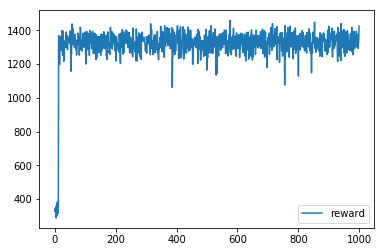

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(scores, label='reward')

plt.legend()
_ = plt.ylim()


## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**: The goal is to go to a specified position. The reward function has two parts, the first is a reward for every step of an episode. The second is a penalty depending on how far the agent is from the target. The penalty shouldn't be superior to the reward because I think the agent might try to end the episode (by crashing or getting out of the simulated space) as soon as possible.

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**: So I use the DDPG algorithm as described in the project. I tried the parameters from it but without success. On reward function, I first tried to put a penalty like squared error but it makes the total reward being a too big number. Then I just put a penalty as a linear function of the euclidean distance from the target. Here I had to tweak the coefficient to ensure the reward is superior to the penalty in order to suppress any temptation from the agent to crash fast.

For the hyperparameters, I use the same parameters than the paper "Continuous control with deep reinforcement learning".

For the networks, I used the architecture from the project and from the paper. So it is 2 hidden layers, 400 and 300 units each for both network and 1E-4 as learning rate. I replaced ReLU by LeakyReLU with alpha 0.1 which seems to make the network really learn something. 

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:
The main difficulty was about finding a good reward function and make the nets to learn something. Then, it seems the reward increses quickly and stabilizes after 30 episodes. I have no clue if it is good or not.

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**: The thing I'm still not confortable with is how to debug the algorithm. There is a lot of hyperparameters to play with but for some of them I have no idea in which situation I should touch them. I'm sure there is some common wisdom and maybe teaching that would be an entire nanodegree by itself but it is what I feel I miss right now. So I will probably take a look on what to plot and how, how to use tensorboard, this kind of things.

For the behavior of the agent, I don't have anything to say in particular. It's just general remark on optimizing things. If the reward function (or the objective function) is not tailored correctly, the agent will try to do something you don't want him to do but still coherent with the function you gave. It always reminds me the story of the evil genius in the bottle granting 3 wishes. It will always grant wishes as you told, but never as you really wanted :-)